In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib notebook

In [6]:
freeFloats = pd.read_csv(r'extraCompanyDataFinal/freeFloatBuffered.csv')
sharesOutstanding = pd.read_csv(r'extraCompanyDataFinal/outSharesBuffered.csv')

FTSE = pd.read_csv(r'FTSE17-20.csv')
FTSE['Date'] = pd.to_datetime(FTSE['Date'])
FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 18, 2017', '%b %d, %Y').date()]
FTSE=FTSE[FTSE['Date'] < datetime.strptime('Jan 01, 2020', '%b %d, %Y').date()]
FTSEStocksEachQuarter = pd.read_csv(r'FTSEStocksEachQuarter.csv')
FTSE

,Unnamed: 0,Open,High,Low,Close,Volume,Date,Day,Year
115,115,7463.5000,7537.7998,7463.5000,7523.7998,551165300,2017-06-19,170,2017
116,116,7523.7998,7561.1001,7472.7002,7472.7002,1005340300,2017-06-20,171,2017
117,117,7472.7002,7477.2002,7417.5000,7447.7998,843652400,2017-06-21,172,2017
118,118,7447.7998,7448.5000,7398.7998,7439.2998,789287000,2017-06-22,173,2017
119,119,7439.2998,7441.7998,7396.7998,7424.1001,608960600,2017-06-23,174,2017
...,...,...,...,...,...,...,...,...,...
753,753,7582.5000,7628.2002,7559.6001,7623.6001,539145700,2019-12-23,357,2019
754,754,7623.6001,7636.2002,7608.2002,7632.2002,185671600,2019-12-24,358,2019
755,755,7632.2002,7665.3999,7622.5000,7644.8999,311117100,2019-12-27,361,2019
756,756,7644.8999,7644.8999,7587.1001,7587.1001,304247900,2019-12-30,364,2019


In [73]:
#freeFloats['AAL'][0]
#print(freeFloats.head())
#print(sharesOutstanding.head())
#print(FTSEStocksEachQuarter.head())
#FTSE.head()

   Unnamed: 0 Unnamed: 0.1    AAL    ABF    ADM    AHT   ANTO   AUTO   AV.L  \
0           0   12/05/2017  0.932  0.438  0.651  0.966  0.341  0.946  0.992   
1           1   16/08/2017  0.818  0.438  0.651  0.966  0.341  0.946  0.992   
2           2   15/11/2017  0.739  0.438  0.651  0.966  0.341  0.946  0.992   
3           3   14/02/2018  0.739  0.438  0.651  0.966  0.341  0.946  0.992   
4           4   17/05/2018  0.739  0.438  0.577  0.966  0.341  0.946  0.992   

     AVV  ...    WPP    WTB    BAB    PFG    GFS    RMG    JE.    MDC   HMSO  \
0  0.989  ...  0.973  0.987  0.988  0.973  0.995  0.987  0.817  0.505  0.993   
1  0.989  ...  0.973  0.987  0.988  0.973  0.995  0.987  0.817  0.505  0.944   
2  0.989  ...  0.973  0.987  0.988  0.973  0.995  0.987  0.863  0.505  0.944   
3  0.989  ...  0.973  0.987  0.988  0.973  0.995  0.987  0.863  0.505  0.944   
4  0.395  ...  0.973  0.987  0.988  0.973  0.995  0.987  0.863  0.505  0.944   

    CTEC  
0  0.983  
1  0.983  
2  0.781  


,Unnamed: 0,Open,High,Low,Close,Volume,Date,Day,Year
116,116,7523.7998,7561.1001,7472.7002,7472.7002,1005340300,2017-06-20,171,2017
117,117,7472.7002,7477.2002,7417.5000,7447.7998,843652400,2017-06-21,172,2017
118,118,7447.7998,7448.5000,7398.7998,7439.2998,789287000,2017-06-22,173,2017
119,119,7439.2998,7441.7998,7396.7998,7424.1001,608960600,2017-06-23,174,2017
120,120,7424.1001,7481.0000,7424.1001,7446.7998,702710000,2017-06-26,177,2017


In [7]:
#dates for share close prices between any two quarters - for index divisor
quarterCutOffDates = [datetime.strptime('Jun 19, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 19, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 18, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 18, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 24, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 23, 2019', '%b %d, %Y').date()
                        ]

quarterNames = ['Q3, 17','Q4, 17', 'Q1, 18', 'Q2, 18', 'Q3, 18', 'Q4, 18', 'Q1, 19', 'Q2, 19', 'Q3, 19', 'Q4, 19']

#quarterCutOffDates.appenddatetime.strptime('Jun 19, 2017', '%b %d, %Y').date(),
quarterCutOffDates.reverse()
quarterNames.reverse()

len(quarterNames)
quarterNames[0][0:2]
quarterCutOffDates

[datetime.date(2019, 9, 23),
 datetime.date(2019, 6, 24),
 datetime.date(2019, 3, 18),
 datetime.date(2018, 12, 24),
 datetime.date(2018, 9, 24),
 datetime.date(2018, 6, 18),
 datetime.date(2018, 3, 19),
 datetime.date(2017, 12, 18),
 datetime.date(2017, 9, 18),
 datetime.date(2017, 6, 19)]

In [8]:
indexDivisors = pd.DataFrame({'Quarter CO Date': quarterCutOffDates}, index = quarterNames)
indexDivisors

,Quarter CO Date
"Q4, 19",2019-09-23
"Q3, 19",2019-06-24
"Q2, 19",2019-03-18
"Q1, 19",2018-12-24
"Q4, 18",2018-09-24
"Q3, 18",2018-06-18
"Q2, 18",2018-03-19
"Q1, 18",2017-12-18
"Q4, 17",2017-09-18
"Q3, 17",2017-06-19


In [23]:
indexDivisorsList = []
for idx, quarter in enumerate(indexDivisors.index.values):
    sumOfMarketCaps = 0
    for stock in FTSEStocksEachQuarter[quarter].values:
        
        if stock[-1] == '.':
            stockPrice = pd.read_csv(f'stockCSVs/{stock}L17-20.csv')
        else:
            stockPrice = pd.read_csv(f'stockCSVs/{stock}.L17-20.csv')
        stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])
        #print(stock)
        #print(type(stockPrice[stockPrice['Date'] == indexDivisors['Quarter CO Date'][quarter]]['Close'].values[0]))
        #print(stockPrice[stockPrice['Date'] == indexDivisors['Quarter CO Date'][quarter]]['Close'].values[0])
        try:
            marketCap = freeFloats[stock][idx]*sharesOutstanding[stock][idx]*stockPrice[stockPrice['Date'] == indexDivisors['Quarter CO Date'][quarter]]['Close'].values[0]
        
        except IndexError:
            print('exception: ', stock)
            continue
        sumOfMarketCaps +=marketCap
        price = stockPrice[stockPrice['Date'] == indexDivisors['Quarter CO Date'][quarter]]['Close'].values[0]
        print(f'Quarter = {quarter}, Stock = {stock}, Free Float = {freeFloats[stock][idx]}, SO = {sharesOutstanding[stock][idx]}, Price = {price}, Market Cap = {marketCap}')
    #print(quarter)
    #print('1', FTSE[FTSE['Date'] == indexDivisors['Quarter CO Date'][quarter]],'\n')
    #print('2',FTSE[FTSE['Date'] == indexDivisors['Quarter CO Date'][quarter]]['Close'].values[0],'\n')
    
    indexDivisorsList.append(sumOfMarketCaps/(FTSE[FTSE['Date'] == indexDivisors['Quarter CO Date'][quarter]]['Close'].values[0])) 
    
indexDivisors['Divisors'] = indexDivisorsList    
#indexDivisors.to_csv('indexDivisors.csv')
indexDivisors

Quarter = Q4, 19, Stock = III, Free Float = 0.9620000000000001, SO = 972808424, Price = 1117.0, Market Cap = 1045335183242.8961
Quarter = Q4, 19, Stock = ABF, Free Float = 0.43799999999999994, SO = 791674183, Price = 2314.0, Market Cap = 802387118044.356
Quarter = Q4, 19, Stock = ADM, Free Float = 0.6509999999999999, SO = 284782447, Price = 2135.0, Market Cap = 395814851348.595
Quarter = Q4, 19, Stock = AAL, Free Float = 0.932, SO = 1402243988, Price = 1870.8, Market Cap = 2444932425163.3726
Quarter = Q4, 19, Stock = ANTO, Free Float = 0.341, SO = 985865695, Price = 884.2, Market Cap = 297250534603.979
Quarter = Q4, 19, Stock = AHT, Free Float = 0.966, SO = 499225712, Price = 2240.0, Market Cap = 1080244564654.08
Quarter = Q4, 19, Stock = AZN, Free Float = 0.996, SO = 1265640640, Price = 7170.0, Market Cap = 9038344815244.8
Quarter = Q4, 19, Stock = AUTO, Free Float = 0.946, SO = 974767869, Price = 517.8, Market Cap = 477479123229.51715
Quarter = Q4, 19, Stock = AVV, Free Float = 0.989

Quarter = Q4, 19, Stock = RSA, Free Float = 0.9890000000000001, SO = 1020283366, Price = 524.4, Market Cap = 529151194561.96564
Quarter = Q4, 19, Stock = SGE, Free Float = 0.997, SO = 1080870017, Price = 673.4, Market Cap = 725674295839.4565
Quarter = Q4, 19, Stock = SBRY, Free Float = 0.95, SO = 2188900863, Price = 216.5, Market Cap = 450202184997.52496
Quarter = Q4, 19, Stock = SDR, Free Float = 0.316, SO = 282500758, Price = 3042.0, Market Cap = 271560068644.176
Quarter = Q4, 19, Stock = SMT, Free Float = 0.0, SO = 0, Price = 511.5, Market Cap = 0.0
Quarter = Q4, 19, Stock = SGRO, Free Float = 0.9940000000000001, SO = 998297537, Price = 790.6, Market Cap = 784518508555.6869
Quarter = Q4, 19, Stock = SVT, Free Float = 0.995, SO = 235923631, Price = 2079.0, Market Cap = 488032802704.755
Quarter = Q4, 19, Stock = SN., Free Float = 0.991, SO = 875167195, Price = 1922.5, Market Cap = 1667366351996.0125
Quarter = Q4, 19, Stock = SMDS, Free Float = 0.993, SO = 951298314, Price = 341.9, Mar

Quarter = Q3, 19, Stock = ITV, Free Float = 0.89, SO = 4025409194, Price = 106.85, Market Cap = 382802325417.22095
Quarter = Q3, 19, Stock = JD., Free Float = 0.414, SO = 973233160, Price = 590.0, Market Cap = 237721931661.59998
Quarter = Q3, 19, Stock = JMAT, Free Float = 0.99, SO = 193533430, Price = 3190.0, Market Cap = 611197925283.0
Quarter = Q3, 19, Stock = KGF, Free Float = 0.9940000000000001, SO = 2189630904, Price = 2.022, Market Cap = 4400869085.760672
Quarter = Q3, 19, Stock = LAND, Free Float = 0.992, SO = 790751441, Price = 819.6, Market Cap = 642915081995.2512
Quarter = Q3, 19, Stock = LGEN, Free Float = 0.9790000000000001, SO = 5955260471, Price = 268.0, Market Cap = 1562493600297.2122
Quarter = Q3, 19, Stock = LLOY, Free Float = 0.987, SO = 71540886364, Price = 57.0, Market Cap = 4024818725952.2764
Quarter = Q3, 19, Stock = LSE, Free Float = 0.987, SO = 349070574, Price = 5588.0, Market Cap = 1925248484734.344
Quarter = Q3, 19, Stock = MCRO, Free Float = 0.9690000000000

Quarter = Q2, 19, Stock = HIK, Free Float = 0.546, SO = 240266361, Price = 1591.5, Market Cap = 208781616788.199
Quarter = Q2, 19, Stock = HLMA, Free Float = 0.973, SO = 379183144, Price = 1668.0, Market Cap = 615400592118.816
Quarter = Q2, 19, Stock = HL., Free Float = 0.5479999999999999, SO = 474318625, Price = 1810.5, Market Cap = 470597121068.24994
Quarter = Q2, 19, Stock = HSBA, Free Float = 0.996, SO = 20049325983, Price = 626.6, Market Cap = 12512656030304.01
Quarter = Q2, 19, Stock = HSX, Free Float = 0.9490000000000001, SO = 285736557, Price = 1607.0, Market Cap = 435760536096.951
Quarter = Q2, 19, Stock = IMB, Free Float = 0.9940000000000001, SO = 958710863, Price = 2639.5, Market Cap = 2515334218951.1694
Quarter = Q2, 19, Stock = INF, Free Float = 0.9990000000000001, SO = 824005051, Price = 721.2, Market Cap = 593678170338.419
Quarter = Q2, 19, Stock = IHG, Free Float = 0.9209999999999999, SO = 189990180, Price = 4598.0, Market Cap = 804562434676.4401
Quarter = Q2, 19, Stock

Quarter = Q1, 19, Stock = BLND, Free Float = 0.9940000000000001, SO = 982982263, Price = 535.0, Market Cap = 522740137640.77
Quarter = Q1, 19, Stock = BT-A, Free Float = 0.8370000000000001, SO = 9958766455, Price = 243.4, Market Cap = 2028857663058.0393
Quarter = Q1, 19, Stock = BNZL, Free Float = 0.9740000000000001, SO = 335672283, Price = 2370.0, Market Cap = 774859184631.54
Quarter = Q1, 19, Stock = BRBY, Free Float = 0.9229999999999999, SO = 418232188, Price = 1670.5, Market Cap = 644860291059.842
Quarter = Q1, 19, Stock = CCL, Free Float = 0.258, SO = 715327040, Price = 3659.0, Market Cap = 675284462954.88
Quarter = Q1, 19, Stock = CNA, Free Float = 0.998, SO = 5592373933, Price = 134.85, Market Cap = 752623361615.3198
Quarter = Q1, 19, Stock = CCH, Free Float = 0.503, SO = 364125748, Price = 2415.0, Market Cap = 442319931754.25995
Quarter = Q1, 19, Stock = CPG, Free Float = 0.995, SO = 1581421327, Price = 1631.0, Market Cap = 2566401693415.315
Quarter = Q1, 19, Stock = CRH, Free 

Quarter = Q4, 18, Stock = AHT, Free Float = 0.966, SO = 489897891, Price = 2339.0, Market Cap = 1106911547369.334
Quarter = Q4, 18, Stock = AZN, Free Float = 0.996, SO = 1265640640, Price = 5652.0, Market Cap = 7124787293690.88
Quarter = Q4, 18, Stock = AUTO, Free Float = 0.946, SO = 953813480, Price = 466.3, Market Cap = 420746011534.904
Quarter = Q4, 18, Stock = AV., Free Float = 0.992, SO = 4011205623, Price = 491.3, Market Cap = 1954939679999.2607
Quarter = Q4, 18, Stock = BA., Free Float = 0.997, SO = 3178194647, Price = 625.2, Market Cap = 1981046271424.487
Quarter = Q4, 18, Stock = BARC, Free Float = 0.996, SO = 17030191601, Price = 175.98, Market Cap = 2984985225472.204
Quarter = Q4, 18, Stock = BDEV, Free Float = 0.968, SO = 1006975378, Price = 558.0, Market Cap = 543911708574.43195
Quarter = Q4, 18, Stock = BKG, Free Float = 0.899, SO = 135415353, Price = 3638.0, Market Cap = 442884307738.386
Quarter = Q4, 18, Stock = BHP, Free Float = 0.395, SO = 5322442951, Price = 1671.2, 

Quarter = Q4, 18, Stock = SGRO, Free Float = 0.9940000000000001, SO = 998297537, Price = 639.0, Market Cap = 634084653386.1421
Quarter = Q4, 18, Stock = SVT, Free Float = 0.995, SO = 235923631, Price = 1831.0, Market Cap = 429816287519.195
Quarter = Q4, 18, Stock = SN., Free Float = 0.991, SO = 875167195, Price = 1383.5, Market Cap = 1199896669953.9575
Quarter = Q4, 18, Stock = SMDS, Free Float = 0.993, SO = 1067886415, Price = 482.6, Market Cap = 511754449991.84705
Quarter = Q4, 18, Stock = SMIN, Free Float = 0.993, SO = 395458972, Price = 1500.5, Market Cap = 589232484173.598
Quarter = Q4, 18, Stock = SKG, Free Float = 0.987, SO = 236802563, Price = 3132.0, Market Cap = 732023974160.892
Quarter = Q4, 18, Stock = SSE, Free Float = 0.9940000000000001, SO = 1019346079, Price = 1130.0, Market Cap = 1144949902854.3801
Quarter = Q4, 18, Stock = STAN, Free Float = 0.9940000000000001, SO = 3290328848, Price = 637.7, Market Cap = 2085653250131.3826
Quarter = Q4, 18, Stock = SLA, Free Float = 

Quarter = Q3, 18, Stock = RB., Free Float = 0.935, SO = 700634909, Price = 6106.0, Market Cap = 4000001765320.9907
Quarter = Q3, 18, Stock = REL, Free Float = 0.467, SO = 1972700000, Price = 1622.0, Market Cap = 1494268959800.0
Quarter = Q3, 18, Stock = RTO, Free Float = 0.987, SO = 1837332965, Price = 349.9, Market Cap = 634525327995.6045
Quarter = Q3, 18, Stock = RIO, Free Float = 0.6579999999999999, SO = 1719151053, Price = 4258.0, Market Cap = 4816655530857.491
Quarter = Q3, 18, Stock = RMG, Free Float = 0.987, SO = 1000000000, Price = 504.6, Market Cap = 498040200000.0
Quarter = Q3, 18, Stock = RMV, Free Float = 0.988, SO = 90995551, Price = 517.2, Market Cap = 46498144189.4736
Quarter = Q3, 18, Stock = RR., Free Float = 0.993, SO = 1859856913, Price = 927.4, Market Cap = 1712757482008.3865
Quarter = Q3, 18, Stock = RBS, Free Float = 0.376, SO = 11993000000, Price = 254.5, Market Cap = 1147634156000.0
Quarter = Q3, 18, Stock = RDSA, Free Float = 0.9990000000000001, SO = 8313573885

Quarter = Q2, 18, Stock = LLOY, Free Float = 0.987, SO = 71540886364, Price = 67.13, Market Cap = 4740106685494.321
Quarter = Q2, 18, Stock = LSE, Free Float = 0.987, SO = 349070574, Price = 3959.0, Market Cap = 1364004787233.942
Quarter = Q2, 18, Stock = MCRO, Free Float = 0.9690000000000001, SO = 425261395, Price = 1218.66, Market Cap = 502183331030.1484
Quarter = Q2, 18, Stock = MDC, Free Float = 0.505, SO = 737243810, Price = 579.0, Market Cap = 215566403824.95
Quarter = Q2, 18, Stock = MKS, Free Float = 0.983, SO = 1624727846, Price = 258.801, Market Cap = 413333011021.011
Quarter = Q2, 18, Stock = MNG, Free Float = 0, SO = 0, Price = 0.0, Market Cap = 0.0
Quarter = Q2, 18, Stock = MRO, Free Float = 0.971, SO = 4858254963, Price = 222.6, Market Cap = 1050085575675.6498
Quarter = Q2, 18, Stock = MNDI, Free Float = 0.988, SO = 485553780, Price = 1917.0, Market Cap = 919636917104.88
Quarter = Q2, 18, Stock = MRW, Free Float = 0.995, SO = 2367096041, Price = 208.2, Market Cap = 490365

Quarter = Q1, 18, Stock = HLMA, Free Float = 0.973, SO = 379183144, Price = 1269.0, Market Cap = 468191457673.128
Quarter = Q1, 18, Stock = HMSO, Free Float = 0.9440000000000001, SO = 773404019, Price = 537.5, Market Cap = 392425199240.6
Quarter = Q1, 18, Stock = HL., Free Float = 0.5479999999999999, SO = 474318625, Price = 1718.0, Market Cap = 446553909966.99994
Quarter = Q1, 18, Stock = HSBA, Free Float = 0.996, SO = 20049325983, Price = 756.1, Market Cap = 15098658194243.316
Quarter = Q1, 18, Stock = IMB, Free Float = 0.9940000000000001, SO = 958710863, Price = 3100.0, Market Cap = 2954171653248.2007
Quarter = Q1, 18, Stock = INF, Free Float = 0.9990000000000001, SO = 1251601165, Price = 737.5, Market Cap = 922132803328.3125
Quarter = Q1, 18, Stock = IHG, Free Float = 0.9209999999999999, SO = 181232051, Price = 4867.3701, Market Cap = 812435712369.3481
Quarter = Q1, 18, Stock = IAG, Free Float = 0.794, SO = 1983178424, Price = 636.5, Market Cap = 1002260695099.5441
Quarter = Q1, 18,

Quarter = Q4, 17, Stock = CCH, Free Float = 0.534, SO = 362924033, Price = 2576.0, Market Cap = 499232493010.27203
Quarter = Q4, 17, Stock = CPG, Free Float = 0.995, SO = 1581421327, Price = 1620.0, Market Cap = 2549093036991.3
Quarter = Q4, 17, Stock = CRH, Free Float = 0.9990000000000001, SO = 807578947, Price = 2673.0, Market Cap = 2156499866805.6692
Quarter = Q4, 17, Stock = CRDA, Free Float = 0.99, SO = 128656975, Price = 3828.1499, Market Cap = 487593004120.74695
Quarter = Q4, 17, Stock = CTEC, Free Float = 0.7809999999999999, SO = 1951472651, Price = 259.2, Market Cap = 395046756399.71515
Quarter = Q4, 17, Stock = DCC, Free Float = 0.948, SO = 98240132, Price = 7100.0, Market Cap = 661234680465.6
Quarter = Q4, 17, Stock = DGE, Free Float = 0.9940000000000001, SO = 2379688729, Price = 2507.5, Market Cap = 5931267071039.696
Quarter = Q4, 17, Stock = DLG, Free Float = 0.986, SO = 1375000000, Price = 374.0, Market Cap = 507050500000.0
Quarter = Q4, 17, Stock = EVR, Free Float = 0.31

Quarter = Q3, 17, Stock = AHT, Free Float = 0.966, SO = 462230321, Price = 1622.0, Market Cap = 724246502919.492
Quarter = Q3, 17, Stock = AZN, Free Float = 0.996, SO = 1311759192, Price = 5344.0, Market Cap = 6982000957559.809
Quarter = Q3, 17, Stock = AUTO, Free Float = 0.946, SO = 929215357, Price = 399.2, Market Cap = 350911860906.6224
Quarter = Q3, 17, Stock = AV., Free Float = 0.992, SO = 3929797977, Price = 537.0, Market Cap = 2093419101539.808
Quarter = Q3, 17, Stock = BA., Free Float = 0.997, SO = 3178194647, Price = 676.5, Market Cap = 2143598532659.4136
Quarter = Q3, 17, Stock = BARC, Free Float = 0.996, SO = 17240956167, Price = 206.75, Market Cap = 3550309416777.141
Quarter = Q3, 17, Stock = BDEV, Free Float = 0.968, SO = 1017928193, Price = 573.5, Market Cap = 565100800487.564
Quarter = Q3, 17, Stock = BHP, Free Float = 0.41700000000000004, SO = 5056874950, Price = 1179.0, Market Cap = 2486177171042.85
Quarter = Q3, 17, Stock = BP, Free Float = 0.992, SO = 20260266756, Pr

Quarter = Q3, 17, Stock = SSE, Free Float = 0.9940000000000001, SO = 1022786841, Price = 1470.0, Market Cap = 1494475676332.3801
Quarter = Q3, 17, Stock = STAN, Free Float = 0.9940000000000001, SO = 3214030148, Price = 760.9, Market Cap = 2430882206375.521
Quarter = Q3, 17, Stock = SLA, Free Float = 0.996, SO = 2409829466, Price = 455.543, Market Cap = 1093389820652.318
Quarter = Q3, 17, Stock = STJ, Free Float = 0.9309999999999999, SO = 528395844, Price = 1238.0, Market Cap = 609017425085.8319
Quarter = Q3, 17, Stock = TW., Free Float = 0.992, SO = 3271773637, Price = 1.806, Market Cap = 5861552602.914624
Quarter = Q3, 17, Stock = TSCO, Free Float = 0.982, SO = 9766305447, Price = 171.05, Market Cap = 1640457068868.5818
Quarter = Q3, 17, Stock = TUI, Free Float = 0.716, SO = 587038187, Price = 1161.0, Market Cap = 487990755936.61194
Quarter = Q3, 17, Stock = ULVR, Free Float = 0.42700000000000005, SO = 2618914239, Price = 4311.0, Market Cap = 4820889474408.484
Quarter = Q3, 17, Stock 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
#FTSE[FTSE['Date'] == indexDivisors['Quarter CO Date']['2018-06-18']]['Close'].values[0]

# run everything above and ignore below

In [233]:
#indexDivisors.to_csv('indexDivisors.csv')

In [40]:
#indexDivisors.shape

(10, 2)

In [124]:


#quarterCutOffDates[0]

datetime.date

In [ ]:
ignore

In [42]:
stockPrice = pd.read_csv(f'stockCSVs/AAL.L17-20.csv')
stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])
stockPrice['Date'][0] > indexDivisors['Quarter CO Date'][0]
stockPrice[stockPrice['Date'] == datetime.strptime('Jun 18, 2018', '%b %d, %Y').date()]['Close'].values[0]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  after removing the cwd from sys.path.


1733.0

In [51]:
#simulatedFTSE = pd.DataFrame(index = FTSE.Date.values)


""
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-26
...
2019-12-23
2019-12-24
2019-12-27
2019-12-30


# ignore below

In [102]:
closePriceDF = pd.DataFrame()
stockWeights
for idx, quarter in enumerate(indexDivisors.index.values):
    #quarterlyStockPrices = pd.DataFrame(index = FTSE[(FTSE['Date'] < quarterCutOffDates[idx]) & (FTSE['Date'] > quarterCutOffDates[idx+1])]['Date'].values)
    quarterlyStockPrices = [0]
    for stock in FTSEStocksEachQuarter[quarter].values:
        if stock == 'AV.':
            stock = 'AV.L'
            stockPrice = pd.read_csv(f'stockCSVs/{stock}17-20.csv')
        elif stock[-1] == '.':
            stockPrice = pd.read_csv(f'stockCSVs/{stock}L17-20.csv')
        else:
            stockPrice = pd.read_csv(f'stockCSVs/{stock}.L17-20.csv')
        stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])
        #print(stock)
        #print(stockPrice[(stockPrice['Date'] < quarterCutOffDates[idx]) & (stockPrice['Date'] > quarterCutOffDates[idx+1])]['Close'])
        stockAdjMarkCaps = freeFloats[stock][idx]*sharesOutstanding[stock][idx]*stockPrice[(stockPrice['Date'] < quarterCutOffDates[idx]) & (stockPrice['Date'] > quarterCutOffDates[idx+1])]['Close']
        #stockAdjMarkCaps = stockAdjMarkCaps.set_index('Date')
        #print('mc', stockAdjMarkCaps)
        #print('qsp',quarterlyStockPrices)
        stockAdjMarkCaps = stockAdjMarkCaps.reset_index(drop=True)
        if quarterlyStockPrices[0] == 0:
            quarterlyStockPrices = stockAdjMarkCaps
        else:
            #print('adding')
            quarterlyStockPrices = quarterlyStockPrices.add(stockAdjMarkCaps)
        print('qsp',quarterlyStockPrices)
        
    quarterlyStockPrices = quarterlyStockPrices.div(indexDivisors['Divisors'][idx])
    print('qsp div',quarterlyStockPrices)
    closePriceDF = pd.concat([closePriceDF, quarterlyStockPrices])
    print('cp',closePriceDF)
#closePrice
simulatedFTSE['Close'] = closePriceDF
simulatedFTSE

mc 689    7.627110e+09
690    7.627110e+09
691    7.627110e+09
692    7.627110e+09
693    7.627110e+09
           ...     
748    7.627110e+09
749    7.627110e+09
750    7.627110e+09
751    7.627110e+09
752    7.627110e+09
Name: Close, Length: 64, dtype: float64
qsp 0     7.627110e+09
1     7.627110e+09
2     7.627110e+09
3     7.627110e+09
4     7.627110e+09
          ...     
59    7.627110e+09
60    7.627110e+09
61    7.627110e+09
62    7.627110e+09
63    7.627110e+09
Name: Close, Length: 64, dtype: float64
mc 689    8.037741e+11
690    7.971858e+11
691    8.003066e+11
692    7.982261e+11
693    7.985728e+11
           ...     
748    9.123079e+11
749    8.901157e+11
750    8.894222e+11
751    9.029456e+11
752    8.984378e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     8.114012e+11
1     8.048129e+11
2     8.079337e+11
3     8.058532e+11
4     8.061999e+11
          ...     
59    9.199350e+11
60    8.977428e+11
61    8.970493e+11
62    9.105727e+11
63    9.060649e+11
N

mc 689    9.027597e+11
690    8.972213e+11
691    9.112803e+11
692    9.240613e+11
693    9.261914e+11
           ...     
748    9.240613e+11
749    9.193749e+11
750    9.321558e+11
751    9.163927e+11
752    9.334339e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     4.398987e+13
1     4.427896e+13
2     4.458549e+13
3     4.494520e+13
4     4.477519e+13
          ...     
59    4.654687e+13
60    4.666135e+13
61    4.670697e+13
62    4.698809e+13
63    4.715894e+13
Name: Close, Length: 64, dtype: float64
mc 689    5.909788e+11
690    5.872802e+11
691    5.449870e+11
692    5.414492e+11
693    5.419316e+11
           ...     
748    5.332478e+11
749    5.390370e+11
750    5.390370e+11
751    5.400019e+11
752    5.768275e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     4.458084e+13
1     4.486624e+13
2     4.513048e+13
3     4.548665e+13
4     4.531712e+13
          ...     
59    4.708012e+13
60    4.720039e+13
61    4.724601e+13
62    4.752809e+13
63    4.77357

mc 689    7.277444e+11
690    7.061611e+11
691    7.174139e+11
692    7.258997e+11
693    7.271910e+11
           ...     
748    7.917564e+11
749    7.983974e+11
750    7.821638e+11
751    7.840085e+11
752    7.825328e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     7.709582e+13
1     7.708301e+13
2     7.783266e+13
3     7.850125e+13
4     7.848657e+13
          ...     
59    7.972095e+13
60    8.012310e+13
61    8.024557e+13
62    8.065250e+13
63    8.104653e+13
Name: Close, Length: 64, dtype: float64
mc 689    4.685964e+11
690    4.678964e+11
691    4.758308e+11
692    4.846986e+11
693    4.851653e+11
           ...     
748    4.837652e+11
749    4.760641e+11
750    4.720969e+11
751    4.570449e+11
752    4.579783e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     7.756442e+13
1     7.755091e+13
2     7.830849e+13
3     7.898595e+13
4     7.897173e+13
          ...     
59    8.020472e+13
60    8.059917e+13
61    8.071766e+13
62    8.110955e+13
63    8.15045

Name: Close, Length: 64, dtype: float64
mc 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
Name: Close, dtype: float64
adding
qsp 0     1.053326e+14
1     1.053719e+14
2     1.060306e+14
3     1.069814e+14
4     1.069474e+14
          ...     
59             NaN
60             NaN
61             NaN
62             NaN
63             NaN
Name: Close, Length: 64, dtype: float64
mc 689    4.918903e+11
690    4.891199e+11
691    4.914285e+11
692    4.911207e+11
693    4.886582e+11
           ...     
748    5.154382e+11
749    5.077428e+11
750    4.943528e+11
751    4.909668e+11
752    4.971231e

mc 689    5.275367e+11
690    5.224914e+11
691    5.297566e+11
692    5.366182e+11
693    5.390400e+11
           ...     
748    5.808151e+11
749    5.715317e+11
750    5.650737e+11
751    5.610375e+11
752    5.606339e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.697198e+14
1     1.698533e+14
2     1.711966e+14
3     1.732529e+14
4     1.726899e+14
          ...     
59             NaN
60             NaN
61             NaN
62             NaN
63             NaN
Name: Close, Length: 64, dtype: float64
mc 689    7.373127e+11
690    7.198551e+11
691    7.370971e+11
692    7.437784e+11
693    7.450716e+11
           ...     
748    7.998151e+11
749    8.043411e+11
750    8.036945e+11
751    8.030479e+11
752    8.049877e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.704571e+14
1     1.705731e+14
2     1.719337e+14
3     1.739967e+14
4     1.734349e+14
          ...     
59             NaN
60             NaN
61             NaN
62             NaN
63           

mc 689    1.923586e+12
690    1.909938e+12
691    1.934023e+12
692    1.962924e+12
693    1.934825e+12
           ...     
748    2.078532e+12
749    2.033574e+12
750    2.020728e+12
751    2.023940e+12
752    2.022334e+12
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.825669e+14
1     1.826413e+14
2     1.841444e+14
3     1.863172e+14
4     1.857357e+14
          ...     
59             NaN
60             NaN
61             NaN
62             NaN
63             NaN
Name: Close, Length: 64, dtype: float64
mc 689    4.213647e+11
690    4.070499e+11
691    4.066108e+11
692    4.149538e+11
693    4.153051e+11
           ...     
748    4.350648e+11
749    4.311129e+11
750    4.293564e+11
751    4.163589e+11
752    4.162711e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.829883e+14
1     1.830484e+14
2     1.845510e+14
3     1.867321e+14
4     1.861510e+14
          ...     
59             NaN
60             NaN
61             NaN
62             NaN
63           

mc 625    1.665192e+12
626    1.671650e+12
627    1.667210e+12
628    1.680932e+12
629    1.703533e+12
           ...     
683    1.592143e+12
684    1.568735e+12
685    1.565910e+12
686    1.568332e+12
687    1.571561e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0     1.569169e+13
1     1.562216e+13
2     1.570597e+13
3     1.580248e+13
4     1.590417e+13
          ...     
58    1.570778e+13
59    1.579160e+13
60    1.584620e+13
61    1.604557e+13
62    1.610759e+13
Name: Close, Length: 63, dtype: float64
mc 625    1.565952e+12
626    1.558664e+12
627    1.558981e+12
628    1.569754e+12
629    1.566586e+12
           ...     
683    1.827049e+12
684    1.856835e+12
685    1.863806e+12
686    1.854300e+12
687    1.811206e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0     1.725765e+13
1     1.718082e+13
2     1.726495e+13
3     1.737224e+13
4     1.747076e+13
          ...     
58    1.753482e+13
59    1.764843e+13
60    1.771001e+13
61    1.789987e+13
62    1.79188

mc 625    6.932047e+11
626    6.867080e+11
627    6.691667e+11
628    6.652686e+11
629    6.613706e+11
           ...     
683    6.239492e+11
684    6.229097e+11
685    6.229097e+11
686    6.353835e+11
687    6.327848e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0     5.291368e+13
1     5.296339e+13
2     5.285385e+13
3     5.298172e+13
4     5.369168e+13
          ...     
58    5.294385e+13
59    5.287979e+13
60    5.287212e+13
61    5.324469e+13
62    5.324730e+13
Name: Close, Length: 63, dtype: float64
mc 625    5.954476e+11
626    5.946056e+11
627    5.875330e+11
628    5.910693e+11
629    5.935953e+11
           ...     
683    5.994891e+11
684    5.930901e+11
685    5.946056e+11
686    5.984787e+11
687    5.871962e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0     5.350913e+13
1     5.355799e+13
2     5.344138e+13
3     5.357279e+13
4     5.428527e+13
          ...     
58    5.354334e+13
59    5.347288e+13
60    5.346673e+13
61    5.384317e+13
62    5.38345

Name: Close, Length: 63, dtype: float64
mc 625    1.555497e+12
626    1.564826e+12
627    1.567741e+12
628    1.571239e+12
629    1.587563e+12
           ...     
683    1.473875e+12
684    1.433063e+12
685    1.423152e+12
686    1.438310e+12
687    1.473875e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0     1.012187e+14
1     1.011146e+14
2     1.008356e+14
3     1.012027e+14
4     1.022863e+14
          ...     
58    1.004194e+14
59    1.003906e+14
60    1.003297e+14
61    1.010230e+14
62    1.009480e+14
Name: Close, Length: 63, dtype: float64
mc 625    4.003635e+12
626    4.018464e+12
627    4.014933e+12
628    3.995868e+12
629    4.041059e+12
           ...     
683    3.821459e+12
684    3.753673e+12
685    3.741669e+12
686    3.817223e+12
687    3.919609e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0     1.052224e+14
1     1.051331e+14
2     1.048506e+14
3     1.051986e+14
4     1.063274e+14
          ...     
58    1.042409e+14
59    1.041443e+14
60    1.040

Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 625    5.814205e+11
626    5.777879e+11
627    5.759716e+11
628    5.820260e+11
629    5.917129e+11
           ...     
683    5.422690e+11
684    5.394436e+11
685    5.360128e+11
686    5.450943e+11
687    5.438835e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 625    8.569293e+11
626    8.616709e+11
627    8.586535e+11
628    8.646882e+11
629    8.754645e+11
           ...     
683    7.118807e+11
684    7.304159e+11
685    7.381748e+11
686    7.383903e+11
687    7.383903e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63,

qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 625    1.209117e+12
626    1.215586e+12
627    1.217825e+12
628    1.231757e+12
629    1.258875e+12
           ...     
683    1.264473e+12
684    1.242206e+12
685    1.250790e+12
686    1.256387e+12
687    1.253900e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
qsp div 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
cp               0
0   7286.027121
1   7285.912141
2   7347.272657
3   7429.648541
4   7406.492420
..          ...
58          NaN
59          NaN
60          NaN
61          NaN
62          NaN

[127 rows x 1 columns]
mc 559    7.627110e+09
560    7.627110e+09
561    7.627110e+09
562    7.627110

mc 559    1.090113e+13
560    1.085623e+13
561    1.100457e+13
562    1.077621e+13
563    1.070009e+13
           ...     
619    1.046196e+13
620    1.065519e+13
621    1.057126e+13
622    1.072156e+13
623    1.085623e+13
Name: Close, Length: 65, dtype: float64
adding
qsp 0     3.491090e+13
1     3.468710e+13
2     3.504461e+13
3     3.419879e+13
4     3.411551e+13
          ...     
60    3.425850e+13
61    3.493845e+13
62    3.480336e+13
63    3.505272e+13
64    3.507152e+13
Name: Close, Length: 65, dtype: float64
mc 559    6.988816e+12
560    6.960402e+12
561    6.950566e+12
562    6.746202e+12
563    6.717788e+12
           ...     
619    6.207424e+12
620    6.250045e+12
621    6.119996e+12
622    6.119996e+12
623    6.113438e+12
Name: Close, Length: 65, dtype: float64
adding
qsp 0     4.189971e+13
1     4.164751e+13
2     4.199518e+13
3     4.094499e+13
4     4.083330e+13
          ...     
60    4.046592e+13
61    4.118850e+13
62    4.092335e+13
63    4.117272e+13
64    4.11849

mc 559    6.154006e+11
560    6.124490e+11
561    6.161385e+11
562    6.179832e+11
563    6.109732e+11
           ...     
619    7.351233e+11
620    7.441625e+11
621    7.316183e+11
622    7.482209e+11
623    7.408420e+11
Name: Close, Length: 65, dtype: float64
adding
qsp 0     7.842718e+13
1     7.820608e+13
2     7.910079e+13
3     7.746187e+13
4     7.722848e+13
          ...     
60    7.793186e+13
61    7.891455e+13
62    7.845331e+13
63    7.874185e+13
64    7.849852e+13
Name: Close, Length: 65, dtype: float64
mc 559    4.696874e+11
560    4.642289e+11
561    4.668282e+11
562    4.609798e+11
563    4.602001e+11
           ...     
619    4.934707e+11
620    4.967197e+11
621    4.832036e+11
622    4.916512e+11
623    4.946403e+11
Name: Close, Length: 65, dtype: float64
adding
qsp 0     7.889687e+13
1     7.867031e+13
2     7.956762e+13
3     7.792285e+13
4     7.768868e+13
          ...     
60    7.842533e+13
61    7.941127e+13
62    7.893652e+13
63    7.923350e+13
64    7.89931

mc 559    5.050701e+11
560    4.994002e+11
561    4.996225e+11
562    4.988443e+11
563    4.975102e+11
           ...     
619    4.376978e+11
620    4.430342e+11
621    4.425895e+11
622    4.425895e+11
623    4.453689e+11
Name: Close, Length: 65, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
60   NaN
61   NaN
62   NaN
63   NaN
64   NaN
Name: Close, Length: 65, dtype: float64
mc 559    2.897004e+12
560    2.900283e+12
561    2.906184e+12
562    2.905857e+12
563    2.885201e+12
           ...     
619    2.718646e+12
620    2.757006e+12
621    2.735039e+12
622    2.762252e+12
623    2.777334e+12
Name: Close, Length: 65, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
60   NaN
61   NaN
62   NaN
63   NaN
64   NaN
Name: Close, Length: 65, dtype: float64
mc 559    7.330081e+11
560    7.148002e+11
561    7.332840e+11
562    7.421121e+11
563    7.415604e+11
           ...     
619    7.644582e+11
620    7.741140e+11
621    7.62

mc 559    6.679106e+11
560    6.693818e+11
561    6.814186e+11
562    6.598861e+11
563    6.499891e+11
           ...     
619    6.974677e+11
620    7.128481e+11
621    7.041549e+11
622    7.155230e+11
623    7.135168e+11
Name: Close, Length: 65, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
60   NaN
61   NaN
62   NaN
63   NaN
64   NaN
Name: Close, Length: 65, dtype: float64
mc 559    6.799293e+11
560    6.783416e+11
561    6.692123e+11
562    6.561139e+11
563    6.557170e+11
           ...     
619    7.251785e+11
620    7.317277e+11
621    7.227970e+11
622    7.273616e+11
623    7.370862e+11
Name: Close, Length: 65, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
60   NaN
61   NaN
62   NaN
63   NaN
64   NaN
Name: Close, Length: 65, dtype: float64
mc 559    4.870938e+11
560    4.849811e+11
561    4.908497e+11
562    4.861549e+11
563    4.762956e+11
           ...     
619    4.828684e+11
620    4.934319e+11
621    4.88

mc 502    2.551608e+11
503    2.625567e+11
504    2.632963e+11
505    2.589932e+11
506    2.481010e+11
507    2.641032e+11
508    2.721043e+11
509    2.735162e+11
510    2.846102e+11
511    2.836016e+11
512    2.811139e+11
513    2.737852e+11
514    2.777521e+11
515    2.767435e+11
516    2.768780e+11
517    2.873668e+11
518    2.792313e+11
519    2.735834e+11
520    2.692803e+11
521    2.682046e+11
522    2.780883e+11
523    2.734490e+11
524    2.760039e+11
525    2.799036e+11
526    2.924095e+11
527    2.969816e+11
528    2.964437e+11
529    3.007468e+11
530    3.007468e+11
531    2.943594e+11
532    2.929474e+11
533    2.825258e+11
534    2.818535e+11
535    2.901908e+11
536    2.915355e+11
537    2.935526e+11
538    2.952335e+11
539    2.992004e+11
540    3.144630e+11
541    3.123786e+11
542    3.180265e+11
543    3.248173e+11
544    3.256914e+11
545    3.242122e+11
546    3.149336e+11
547    3.170852e+11
548    3.165473e+11
549    3.201780e+11
550    3.251535e+11
551    3.232709e+

mc 502    9.601433e+12
503    9.934425e+12
504    9.801030e+12
505    1.002533e+13
506    1.005300e+13
507    1.029212e+13
508    1.029212e+13
509    1.027236e+13
510    1.033362e+13
511    1.041464e+13
512    1.030002e+13
513    1.029212e+13
514    1.032967e+13
515    1.019726e+13
516    1.009845e+13
517    1.034152e+13
518    1.031781e+13
519    1.013007e+13
520    1.004905e+13
521    1.011624e+13
522    1.001743e+13
523    9.780280e+12
524    9.940354e+12
525    1.010636e+13
526    1.027829e+13
527    1.030595e+13
528    1.027829e+13
529    1.080989e+13
530    1.094822e+13
531    1.081582e+13
532    1.075060e+13
533    1.075653e+13
534    1.077432e+13
535    1.089289e+13
536    1.068934e+13
537    1.074072e+13
538    1.063203e+13
539    1.060831e+13
540    1.065970e+13
541    1.064981e+13
542    1.061424e+13
543    1.061227e+13
544    1.053322e+13
545    1.055298e+13
546    1.056088e+13
547    1.053322e+13
548    1.059448e+13
549    1.063796e+13
550    1.063203e+13
551    1.068539e+

mc 502    6.767609e+11
503    6.935553e+11
504    6.944781e+11
505    7.088734e+11
506    6.885724e+11
507    7.027831e+11
508    7.238223e+11
509    7.400630e+11
510    7.465225e+11
511    7.444924e+11
512    7.452306e+11
513    7.446769e+11
514    7.513209e+11
515    7.487371e+11
516    7.542737e+11
517    7.692226e+11
518    7.660852e+11
519    7.671925e+11
520    7.507672e+11
521    7.566729e+11
522    7.568575e+11
523    7.681153e+11
524    7.682999e+11
525    7.867553e+11
526    7.950603e+11
527    7.980131e+11
528    8.028115e+11
529    8.175759e+11
530    8.111165e+11
531    7.976440e+11
532    7.806650e+11
533    7.985668e+11
534    7.937684e+11
535    8.011505e+11
536    8.007814e+11
537    8.005969e+11
538    7.913692e+11
539    8.070563e+11
540    8.029961e+11
541    8.066872e+11
542    8.029961e+11
543    8.022579e+11
544    7.952448e+11
545    7.769739e+11
546    7.780813e+11
547    7.874935e+11
548    7.769739e+11
549    7.836179e+11
550    7.742056e+11
551    7.553811e+

mc 502    4.228584e+11
503    4.313996e+11
504    4.320775e+11
505    4.323487e+11
506    4.327554e+11
507    4.364159e+11
508    4.318064e+11
509    4.380428e+11
510    4.427880e+11
511    4.389918e+11
512    4.364159e+11
513    4.353313e+11
514    4.406188e+11
515    4.403476e+11
516    4.365515e+11
517    4.422456e+11
518    4.445504e+11
519    4.480754e+11
520    4.490244e+11
521    4.536340e+11
522    4.506513e+11
523    4.510580e+11
524    4.581079e+11
525    4.595992e+11
526    4.564810e+11
527    4.658357e+11
528    4.657001e+11
529    4.689539e+11
530    4.680049e+11
531    4.654290e+11
532    4.654290e+11
533    4.619040e+11
534    4.643444e+11
535    4.738346e+11
536    4.720722e+11
537    4.747836e+11
538    4.730212e+11
539    4.747836e+11
540    4.777663e+11
541    4.762750e+11
542    4.806134e+11
543    4.848162e+11
544    4.796644e+11
545    4.784442e+11
546    4.835960e+11
547    4.861720e+11
548    4.829182e+11
549    4.797999e+11
550    4.812912e+11
551    4.765461e+

mc 502    1.930220e+11
503    1.940191e+11
504    1.920248e+11
505    1.962983e+11
506    1.927370e+11
507    1.960134e+11
508    1.964408e+11
509    2.037058e+11
510    2.094039e+11
511    2.072671e+11
512    2.049879e+11
513    1.980078e+11
514    1.924521e+11
515    1.917399e+11
516    1.957285e+11
517    2.035634e+11
518    2.025662e+11
519    1.964408e+11
520    1.907427e+11
521    1.913125e+11
522    1.858994e+11
523    1.814834e+11
524    1.823381e+11
525    1.886060e+11
526    1.914550e+11
527    1.893182e+11
528    1.890333e+11
529    1.923097e+11
530    1.944465e+11
531    1.871814e+11
532    1.844749e+11
533    1.866116e+11
534    1.840475e+11
535    1.866116e+11
536    1.827654e+11
537    1.824805e+11
538    1.794890e+11
539    1.752155e+11
540    1.849022e+11
541    1.831928e+11
542    1.789192e+11
543    1.843324e+11
544    1.908852e+11
545    1.907427e+11
546    1.870390e+11
547    1.897456e+11
548    1.854720e+11
549    1.985776e+11
550    2.042756e+11
551    1.948738e+

mc 502    4.192195e+11
503    4.338624e+11
504    4.395568e+11
505    4.371164e+11
506    4.178637e+11
507    4.148809e+11
508    4.175925e+11
509    4.211177e+11
510    4.281679e+11
511    4.211177e+11
512    4.175925e+11
513    4.205754e+11
514    4.192195e+11
515    4.175925e+11
516    4.132539e+11
517    4.173214e+11
518    4.192195e+11
519    4.165079e+11
520    4.113558e+11
521    4.091865e+11
522    3.986111e+11
523    3.907473e+11
524    3.907473e+11
525    3.877645e+11
526    3.845105e+11
527    3.850529e+11
528    3.904761e+11
529    3.899338e+11
530    3.983399e+11
531    4.053902e+11
532    4.048478e+11
533    4.086441e+11
534    4.127116e+11
535    4.186772e+11
536    4.159656e+11
537    4.219312e+11
538    4.175925e+11
539    4.241005e+11
540    4.297949e+11
541    4.325066e+11
542    4.322354e+11
543    4.449801e+11
544    4.430820e+11
545    4.262698e+11
546    4.335912e+11
547    4.411838e+11
548    4.430820e+11
549    4.449801e+11
550    4.438955e+11
551    4.406415e+

mc 502    4.401242e+11
503    4.471102e+11
504    4.472894e+11
505    4.476476e+11
506    4.492598e+11
507    4.532007e+11
508    4.517676e+11
509    4.707555e+11
510    4.938634e+11
511    4.920721e+11
512    4.976251e+11
513    4.933260e+11
514    4.918929e+11
515    4.917138e+11
516    4.625155e+11
517    4.752338e+11
518    4.789955e+11
519    4.748755e+11
520    4.768459e+11
521    4.789955e+11
522    4.729051e+11
523    4.598285e+11
524    4.727259e+11
525    4.772042e+11
526    4.632320e+11
527    4.720094e+11
528    4.700390e+11
529    4.791746e+11
530    4.759503e+11
531    4.626946e+11
532    4.680685e+11
533    4.729051e+11
534    4.727259e+11
535    4.788164e+11
536    4.827573e+11
537    4.768459e+11
538    4.766668e+11
539    4.739799e+11
540    4.834738e+11
541    4.775625e+11
542    4.798912e+11
543    4.739799e+11
544    4.703972e+11
545    4.558877e+11
546    4.696807e+11
547    4.877729e+11
548    4.926095e+11
549    4.809660e+11
550    4.813242e+11
551    4.711138e+

mc 502    2.935741e+11
503    3.057317e+11
504    3.088418e+11
505    3.038468e+11
506    2.933856e+11
507    3.103497e+11
508    3.134598e+11
509    3.305182e+11
510    3.331571e+11
511    3.330628e+11
512    3.219419e+11
513    3.193973e+11
514    3.188318e+11
515    3.122346e+11
516    3.060144e+11
517    3.195858e+11
518    3.257117e+11
519    3.193030e+11
520    3.092188e+11
521    3.078051e+11
522    3.088418e+11
523    3.032813e+11
524    3.085591e+11
525    3.212822e+11
526    3.178893e+11
527    3.295758e+11
528    3.265599e+11
529    3.315549e+11
530    3.286333e+11
531    3.109152e+11
532    2.954590e+11
533    3.011137e+11
534    3.022446e+11
535    3.029043e+11
536    3.034698e+11
537    3.204340e+11
538    3.238268e+11
539    3.182663e+11
540    3.245808e+11
541    3.204340e+11
542    3.279736e+11
543    3.346650e+11
544    3.328743e+11
545    3.280678e+11
546    3.277851e+11
547    3.356075e+11
548    3.408852e+11
549    3.420161e+11
550    3.393773e+11
551    3.463514e+

mc 502    7.053183e+11
503    7.225775e+11
504    7.230398e+11
505    7.262760e+11
506    7.293580e+11
507    7.419942e+11
508    7.521648e+11
509    7.743553e+11
510    7.862981e+11
511    7.870686e+11
512    7.916916e+11
513    7.640306e+11
514    7.524730e+11
515    7.074757e+11
516    6.988461e+11
517    7.130233e+11
518    7.198037e+11
519    7.091708e+11
520    7.088626e+11
521    7.006953e+11
522    6.945312e+11
523    6.911410e+11
524    7.026986e+11
525    7.141020e+11
526    6.980755e+11
527    7.091708e+11
528    7.159512e+11
529    7.272006e+11
530    7.148725e+11
531    7.093249e+11
532    7.137938e+11
533    7.270465e+11
534    7.258137e+11
535    7.157971e+11
536    7.161053e+11
537    7.093249e+11
538    7.019281e+11
539    6.949935e+11
540    6.875967e+11
541    6.806622e+11
542    6.957640e+11
543    6.581635e+11
544    6.621701e+11
545    6.483011e+11
546    6.518454e+11
547    6.483011e+11
548    6.493798e+11
549    6.410583e+11
550    6.348943e+11
551    6.338156e+

mc 502    4.270521e+12
503    4.328620e+12
504    4.291230e+12
505    4.245786e+12
506    4.191139e+12
507    4.364284e+12
508    4.407427e+12
509    4.442516e+12
510    4.493136e+12
511    4.466675e+12
512    4.449418e+12
513    4.441940e+12
514    4.489109e+12
515    4.462649e+12
516    4.483357e+12
517    4.515570e+12
518    4.522473e+12
519    4.424108e+12
520    4.327469e+12
521    4.331496e+12
522    4.461498e+12
523    4.538004e+12
524    4.691016e+12
525    4.755442e+12
526    4.817567e+12
527    4.866462e+12
528    4.909029e+12
529    4.950445e+12
530    4.945268e+12
531    4.909029e+12
532    4.906728e+12
533    4.932038e+12
534    4.940666e+12
535    5.009694e+12
536    5.001641e+12
537    5.059739e+12
538    5.024650e+12
539    5.066642e+12
540    5.118413e+12
541    5.052837e+12
542    5.136821e+12
543    5.090802e+12
544    5.045934e+12
545    5.090802e+12
546    4.988411e+12
547    5.011420e+12
548    5.056863e+12
549    5.109785e+12
550    5.151777e+12
551    4.768097e+

Name: Close, dtype: float64
mc 502    5.425300e+11
503    5.508478e+11
504    5.510558e+11
505    5.437777e+11
506    5.468969e+11
507    5.406585e+11
508    5.525114e+11
509    5.541750e+11
510    5.668597e+11
511    5.739298e+11
512    5.735139e+11
513    5.689391e+11
514    5.708106e+11
515    5.676914e+11
516    5.645723e+11
517    5.778808e+11
518    5.676914e+11
519    5.753854e+11
520    5.766331e+11
521    5.793364e+11
522    5.878622e+11
523    5.801682e+11
524    5.905655e+11
525    5.978435e+11
526    5.930608e+11
527    5.965959e+11
528    6.001309e+11
529    6.090726e+11
530    6.084488e+11
531    6.049137e+11
532    6.069932e+11
533    6.111521e+11
534    5.903575e+11
535    5.864065e+11
536    5.901496e+11
537    5.951403e+11
538    5.943085e+11
539    5.986753e+11
540    4.876324e+11
541    4.853450e+11
542    4.857609e+11
543    4.890880e+11
544    4.861768e+11
545    4.803543e+11
546    4.761954e+11
547    4.820179e+11
548    4.859688e+11
549    4.803543e+11
550    4.

mc 502    5.301325e+11
503    5.397534e+11
504    5.356302e+11
505    5.428950e+11
506    5.269910e+11
507    5.383790e+11
508    5.438767e+11
509    5.474109e+11
510    5.605661e+11
511    5.654747e+11
512    5.688126e+11
513    5.654747e+11
514    5.637076e+11
515    5.609587e+11
516    5.599770e+11
517    5.733285e+11
518    5.741139e+11
519    5.719541e+11
520    5.619405e+11
521    5.558538e+11
522    5.587990e+11
523    5.582099e+11
524    5.666528e+11
525    5.772554e+11
526    5.672418e+11
527    5.764700e+11
528    5.798079e+11
529    5.894288e+11
530    5.862873e+11
531    5.792189e+11
532    5.750956e+11
533    5.803969e+11
534    5.762737e+11
535    5.807896e+11
536    5.811823e+11
537    5.856983e+11
538    5.819677e+11
539    5.737212e+11
540    5.741139e+11
541    5.619405e+11
542    5.686162e+11
543    5.733285e+11
544    5.699906e+11
545    5.650820e+11
546    5.617441e+11
547    5.672418e+11
548    5.745066e+11
549    5.760773e+11
550    5.715614e+11
551    5.633149e+

mc 502    4.318270e+09
503    4.443226e+09
504    4.422129e+09
505    4.441603e+09
506    4.469190e+09
507    4.556822e+09
508    4.534102e+09
509    4.556822e+09
510    4.839189e+09
511    4.832698e+09
512    5.064758e+09
513    5.095591e+09
514    5.038793e+09
515    5.322783e+09
516    5.257871e+09
517    5.426642e+09
518    5.379581e+09
519    5.368221e+09
520    5.389318e+09
521    5.400677e+09
522    5.381204e+09
523    5.311423e+09
524    5.390941e+09
525    5.442870e+09
526    5.360107e+09
527    5.444493e+09
528    5.465589e+09
529    5.467212e+09
530    5.463967e+09
531    5.330897e+09
532    5.337388e+09
533    5.442870e+09
534    5.332520e+09
535    5.402300e+09
536    5.327651e+09
537    5.327651e+09
538    5.342257e+09
539    5.390941e+09
540    5.423397e+09
541    5.428265e+09
542    5.438002e+09
543    5.366599e+09
544    5.548352e+09
545    5.744711e+09
546    5.887517e+09
547    5.835588e+09
548    5.885895e+09
549    5.988131e+09
550    5.957298e+09
551    5.838833e+

qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
50   NaN
51   NaN
52   NaN
53   NaN
54   NaN
55   NaN
Name: Close, dtype: float64
mc 502    1.020723e+12
503    1.048756e+12
504    1.040887e+12
505    1.045067e+12
506    1.035477e+12
507    1.048264e+12
508    1.064739e+12
509    1.075067e+12
510    1.083181e+12
511    1.081952e+12
512    1.081214e+12
513    1.086624e+12
514    1.082689e+12
515    1.078017e+12
516    1.061542e+12
517    1.076788e+12
518    1.074329e+12
519    1.081214e+12
520    1.065723e+12
521    1.068919e+12
522    1.073345e+12
523    1.072116e+12
524    1.080230e+12
5

mc 437    2.970398e+12
438    2.978540e+12
439    2.996859e+12
440    2.913745e+12
441    2.924261e+12
           ...     
496    2.592483e+12
497    2.581627e+12
498    2.569075e+12
499    2.507673e+12
500    2.527349e+12
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.900436e+13
1     1.906589e+13
2     1.923733e+13
3     1.915017e+13
4     1.914723e+13
          ...     
59    1.739867e+13
60    1.734201e+13
61    1.734168e+13
62    1.716985e+13
63    1.718691e+13
Name: Close, Length: 64, dtype: float64
mc 437    5.480057e+11
438    5.507350e+11
439    5.556087e+11
440    5.526845e+11
441    5.441067e+11
           ...     
496    4.230424e+11
497    4.280137e+11
498    4.388334e+11
499    4.343496e+11
500    4.405880e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.955236e+13
1     1.961663e+13
2     1.979294e+13
3     1.970285e+13
4     1.969134e+13
          ...     
59    1.782171e+13
60    1.777002e+13
61    1.778052e+13
62    1.760420e+13
63    1.76274

mc 437    1.774984e+11
438    1.754279e+11
439    1.758670e+11
440    1.777493e+11
441    1.782513e+11
           ...     
496    1.456252e+11
497    1.449350e+11
498    1.503309e+11
499    1.484800e+11
500    1.523700e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     6.238483e+13
1     6.249272e+13
2     6.304382e+13
3     6.278726e+13
4     6.282652e+13
          ...     
59    5.646612e+13
60    5.586752e+13
61    5.618870e+13
62    5.555771e+13
63    5.567693e+13
Name: Close, Length: 64, dtype: float64
mc 437    3.458791e+11
438    3.531417e+11
439    3.438041e+11
440    3.408213e+11
441    3.169586e+11
           ...     
496    2.727348e+11
497    2.796083e+11
498    2.788302e+11
499    2.828505e+11
500    2.834990e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     6.273071e+13
1     6.284587e+13
2     6.338762e+13
3     6.312808e+13
4     6.314348e+13
          ...     
59    5.673885e+13
60    5.614713e+13
61    5.646753e+13
62    5.584056e+13
63    5.59604

Name: Close, Length: 64, dtype: float64
mc 437    6.494517e+11
438    6.540118e+11
439    6.526879e+11
440    6.497459e+11
441    6.528350e+11
           ...     
496    6.087047e+11
497    6.078221e+11
498    6.109112e+11
499    6.084105e+11
500    5.987018e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.017215e+14
1     1.019802e+14
2     1.024883e+14
3     1.019072e+14
4     1.019084e+14
          ...     
59    9.244794e+13
60    9.170597e+13
61    9.251142e+13
62    9.163095e+13
63    9.196740e+13
Name: Close, Length: 64, dtype: float64
mc 437    1.534509e+12
438    1.545003e+12
439    1.552582e+12
440    1.528678e+12
441    1.511188e+12
           ...     
496    1.306548e+12
497    1.320540e+12
498    1.333367e+12
499    1.317625e+12
500    1.322289e+12
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.032560e+14
1     1.035252e+14
2     1.040409e+14
3     1.034358e+14
4     1.034196e+14
          ...     
59    9.375449e+13
60    9.302651e+13
61    9.384

mc 437    4.552385e+12
438    4.470702e+12
439    4.460923e+12
440    4.463799e+12
441    4.421232e+12
           ...     
496    4.328620e+12
497    4.293531e+12
498    4.398798e+12
499    4.310212e+12
500    4.371762e+12
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 437    4.711938e+11
438    4.742535e+11
439    4.678380e+11
440    4.708977e+11
441    3.863118e+11
           ...     
496    2.811963e+11
497    2.830716e+11
498    2.763600e+11
499    2.727081e+11
500    2.768535e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 437    4.282558e+10
438    4.319419e+10
439    4.286604e+10
440    4.234460e+10
441    4.282558e+10
           ...     
496    3.892826e+10
497    3.823151e+10
498    3.81

mc 437    5.581020e+11
438    5.583480e+11
439    5.679407e+11
440    5.627754e+11
441    5.657270e+11
           ...     
496    4.556316e+11
497    4.554348e+11
498    4.559268e+11
499    4.564187e+11
500    4.613381e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 437    5.580808e+09
438    5.592168e+09
439    5.655457e+09
440    5.575940e+09
441    5.465589e+09
           ...     
496    4.251735e+09
497    4.319893e+09
498    4.388050e+09
499    4.373445e+09
500    4.373445e+09
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 437    2.316109e+12
438    2.339126e+12
439    2.317068e+12
440    2.299805e+12
441    2.270074e+12
           ...     
496    1.824595e+12
497    1.862477e+12
498    1.85

mc 368    3.452504e+12
369    3.444935e+12
370    3.435685e+12
371    3.502961e+12
372    3.369671e+12
           ...     
431    3.222925e+12
432    3.257825e+12
433    3.361261e+12
434    3.401627e+12
435    3.527768e+12
Name: Close, Length: 68, dtype: float64
adding
qsp 0     2.334604e+13
1     2.336765e+13
2     2.297180e+13
3     2.322110e+13
4     2.277059e+13
          ...     
63    2.255370e+13
64    2.256925e+13
65    2.285490e+13
66    2.296229e+13
67    2.337093e+13
Name: Close, Length: 68, dtype: float64
mc 368    1.127825e+13
369    1.115375e+13
370    1.105691e+13
371    1.139485e+13
372    1.100751e+13
           ...     
431    1.084348e+13
432    1.087115e+13
433    1.093637e+13
434    1.097787e+13
435    1.120513e+13
Name: Close, Length: 68, dtype: float64
adding
qsp 0     3.462429e+13
1     3.452140e+13
2     3.402871e+13
3     3.461595e+13
4     3.377810e+13
          ...     
63    3.339718e+13
64    3.344040e+13
65    3.379126e+13
66    3.394015e+13
67    3.45760

mc 368    1.644664e+11
369    1.674010e+11
370    1.645302e+11
371    1.665078e+11
372    1.603834e+11
           ...     
431    1.581186e+11
432    1.624249e+11
433    1.682303e+11
434    1.705270e+11
435    1.745461e+11
Name: Close, Length: 68, dtype: float64
adding
qsp 0     6.234918e+13
1     6.253193e+13
2     6.202527e+13
3     6.296249e+13
4     6.148125e+13
          ...     
63    6.075868e+13
64    6.067322e+13
65    6.084667e+13
66    6.100128e+13
67    6.210572e+13
Name: Close, Length: 68, dtype: float64
mc 368    4.590971e+11
369    4.658409e+11
370    4.627284e+11
371    4.644144e+11
372    4.471658e+11
           ...     
431    3.731137e+11
432    3.688340e+11
433    3.696121e+11
434    3.690933e+11
435    3.617011e+11
Name: Close, Length: 68, dtype: float64
adding
qsp 0     6.280828e+13
1     6.299777e+13
2     6.248800e+13
3     6.342690e+13
4     6.192842e+13
          ...     
63    6.113179e+13
64    6.104205e+13
65    6.121629e+13
66    6.137038e+13
67    6.24674

mc 368    7.137029e+11
369    7.198340e+11
370    7.031650e+11
371    7.069970e+11
372    6.907111e+11
           ...     
431    6.725093e+11
432    6.753833e+11
433    6.876456e+11
434    7.002910e+11
435    7.037398e+11
Name: Close, Length: 68, dtype: float64
adding
qsp 0     1.030912e+14
1     1.035217e+14
2     1.023955e+14
3     1.039925e+14
4     1.014686e+14
          ...     
63    9.841333e+13
64    9.825295e+13
65    9.886016e+13
66    9.910354e+13
67    1.010433e+14
Name: Close, Length: 68, dtype: float64
mc 368    6.490604e+09
369    6.433052e+09
370    6.394684e+09
371    6.452236e+09
372    6.413868e+09
           ...     
431    5.669953e+09
432    5.618795e+09
433    5.264956e+09
434    5.173299e+09
435    5.463192e+09
Name: Close, Length: 68, dtype: float64
adding
qsp 0     1.030977e+14
1     1.035281e+14
2     1.024019e+14
3     1.039990e+14
4     1.014751e+14
          ...     
63    9.841900e+13
64    9.825857e+13
65    9.886543e+13
66    9.910871e+13
67    1.01048

Name: Close, Length: 68, dtype: float64
mc 368    4.660550e+12
369    4.662247e+12
370    4.640754e+12
371    4.730684e+12
372    4.572882e+12
           ...     
431    4.077981e+12
432    4.089859e+12
433    4.210897e+12
434    4.317796e+12
435    4.435441e+12
Name: Close, Length: 68, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
63   NaN
64   NaN
65   NaN
66   NaN
67   NaN
Name: Close, Length: 68, dtype: float64
mc 368    5.057388e+11
369    4.922169e+11
370    4.880715e+11
371    4.972506e+11
372    4.856040e+11
           ...     
431    4.826430e+11
432    4.792872e+11
433    4.679367e+11
434    4.664562e+11
435    4.707003e+11
Name: Close, Length: 68, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
63   NaN
64   NaN
65   NaN
66   NaN
67   NaN
Name: Close, Length: 68, dtype: float64
mc 368    4.637228e+10
369    4.709151e+10
370    4.718141e+10
371    4.786468e+10
372    4.809843e+10
           ...     
431    4.29

mc 368    4.680295e+12
369    4.700474e+12
370    4.703933e+12
371    4.766199e+12
372    4.743714e+12
           ...     
431    4.904567e+12
432    4.886117e+12
433    4.778882e+12
434    4.845760e+12
435    4.922439e+12
Name: Close, Length: 68, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
63   NaN
64   NaN
65   NaN
66   NaN
67   NaN
Name: Close, Length: 68, dtype: float64
mc 368    5.262228e+11
369    5.350520e+11
370    5.020442e+11
371    5.097868e+11
372    5.100585e+11
           ...     
431    4.799032e+11
432    4.785449e+11
433    4.686290e+11
434    4.750132e+11
435    4.767790e+11
Name: Close, Length: 68, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
63   NaN
64   NaN
65   NaN
66   NaN
67   NaN
Name: Close, Length: 68, dtype: float64
mc 368    4.927881e+12
369    4.938488e+12
370    4.889697e+12
371    4.966065e+12
372    4.883863e+12
           ...     
431    4.456943e+12
432    4.479217e+12
433    4.47

mc 307    1.767442e+12
308    1.803089e+12
309    1.757701e+12
310    1.717702e+12
311    1.713557e+12
312    1.741950e+12
313    1.675422e+12
314    1.721225e+12
315    1.699256e+12
316    1.645371e+12
317    1.704438e+12
318    1.677080e+12
319    1.668790e+12
320    1.753349e+12
321    1.732831e+12
322    1.730966e+12
323    1.749204e+12
324    1.719774e+12
325    1.759774e+12
326    1.867959e+12
327    1.848063e+12
328    1.831276e+12
329    1.839980e+12
330    1.810965e+12
331    1.735733e+12
332    1.727443e+12
333    1.760810e+12
334    1.771380e+12
335    1.765162e+12
336    1.821120e+12
337    1.794799e+12
338    1.814903e+12
339    1.791691e+12
340    1.813452e+12
341    1.865472e+12
342    1.926819e+12
343    1.907544e+12
344    1.867959e+12
345    1.961015e+12
346    1.951482e+12
347    1.927440e+12
348    1.979668e+12
349    1.996248e+12
350    1.896145e+12
351    1.866301e+12
352    1.843711e+12
353    1.815317e+12
354    1.844540e+12
355    1.862363e+12
356    1.913347e+

mc 307    3.662959e+12
308    3.586630e+12
309    3.511149e+12
310    3.466199e+12
311    3.492490e+12
312    3.496731e+12
313    3.494187e+12
314    3.502668e+12
315    3.508604e+12
316    3.517933e+12
317    3.599351e+12
318    3.554402e+12
319    3.582389e+12
320    3.642605e+12
321    3.640060e+12
322    3.663807e+12
323    3.618858e+12
324    3.626491e+12
325    3.591718e+12
326    3.629883e+12
327    3.633276e+12
328    3.655326e+12
329    3.669744e+12
330    3.653630e+12
331    3.612921e+12
332    3.562035e+12
333    3.544225e+12
334    3.515389e+12
335    3.485706e+12
336    3.484857e+12
337    3.438212e+12
338    3.487402e+12
339    3.509452e+12
340    3.578149e+12
341    3.626491e+12
342    3.637516e+12
343    3.594263e+12
344    3.589174e+12
345    3.536592e+12
346    3.545073e+12
347    3.519630e+12
348    3.543377e+12
349    3.580693e+12
350    3.541680e+12
351    3.482313e+12
352    3.497579e+12
353    3.371381e+12
354    3.378505e+12
355    3.345599e+12
356    3.424642e+

mc 307    6.731794e+11
308    6.663135e+11
309    6.558513e+11
310    6.520914e+11
311    6.480046e+11
312    6.623902e+11
313    6.757949e+11
314    6.849494e+11
315    6.764488e+11
316    6.767757e+11
317    6.787374e+11
318    6.833146e+11
319    6.921421e+11
320    6.963924e+11
321    6.918152e+11
322    6.862571e+11
323    6.869110e+11
324    6.862571e+11
325    6.977002e+11
326    6.937769e+11
327    6.927960e+11
328    6.963924e+11
329    6.784105e+11
330    6.820069e+11
331    6.767757e+11
332    6.793913e+11
333    6.859302e+11
334    6.901805e+11
335    7.124127e+11
336    7.052199e+11
337    7.052199e+11
338    7.084894e+11
339    7.147013e+11
340    7.199325e+11
341    7.330102e+11
342    7.307216e+11
343    7.294139e+11
344    7.284330e+11
345    7.352989e+11
346    7.339911e+11
347    7.421647e+11
348    7.558964e+11
349    7.532808e+11
350    7.578581e+11
351    7.437994e+11
352    7.516461e+11
353    7.490305e+11
354    7.500114e+11
355    7.487036e+11
356    7.545886e+

mc 307    6.109492e+11
308    6.118809e+11
309    5.980388e+11
310    5.961756e+11
311    5.885886e+11
312    5.999021e+11
313    6.049605e+11
314    6.080217e+11
315    6.048267e+11
316    5.968408e+11
317    6.177383e+11
318    6.150759e+11
319    6.148096e+11
320    6.219976e+11
321    6.121472e+11
322    6.185361e+11
323    6.196016e+11
324    6.162740e+11
325    6.190688e+11
326    6.169392e+11
327    6.082882e+11
328    6.105503e+11
329    6.136116e+11
330    6.148096e+11
331    5.907183e+11
332    6.024307e+11
333    5.989704e+11
334    5.937796e+11
335    5.973736e+11
336    6.036286e+11
337    5.932468e+11
338    5.947112e+11
339    6.089534e+11
340    6.118809e+11
341    6.177383e+11
342    6.161401e+11
343    6.112156e+11
344    6.084207e+11
345    6.108167e+11
346    6.157412e+11
347    6.182698e+11
348    6.311814e+11
349    6.338438e+11
350    6.302498e+11
351    6.354407e+11
352    6.362398e+11
353    6.226629e+11
354    6.259905e+11
355    6.205332e+11
356    6.281202e+

mc 307    1.279759e+12
308    1.289953e+12
309    1.264709e+12
310    1.266165e+12
311    1.246259e+12
312    1.329766e+12
313    1.320539e+12
314    1.299665e+12
315    1.276845e+12
316    1.263737e+12
317    1.286071e+12
318    1.280729e+12
319    1.279759e+12
320    1.291411e+12
321    1.282187e+12
322    1.288012e+12
323    1.287527e+12
324    1.280729e+12
325    1.305005e+12
326    1.314714e+12
327    1.349184e+12
328    1.366662e+12
329    1.364234e+12
330    1.372002e+12
331    1.350155e+12
332    1.354524e+12
333    1.363263e+12
334    1.354524e+12
335    1.348699e+12
336    1.357438e+12
337    1.348699e+12
338    1.352098e+12
339    1.362778e+12
340    1.362778e+12
341    1.373945e+12
342    1.372972e+12
343    1.371517e+12
344    1.376857e+12
345    1.378800e+12
346    1.380256e+12
347    1.392879e+12
348    1.415696e+12
349    1.425408e+12
350    1.409871e+12
351    1.413755e+12
352    1.411812e+12
353    1.410842e+12
354    1.418125e+12
355    1.418125e+12
356    1.430263e+

mc 307    1.396042e+13
308    1.385858e+13
309    1.353707e+13
310    1.331142e+13
311    1.328346e+13
312    1.341925e+13
313    1.337333e+13
314    1.328746e+13
315    1.325151e+13
316    1.322156e+13
317    1.345320e+13
318    1.327548e+13
319    1.338531e+13
320    1.344921e+13
321    1.349114e+13
322    1.361096e+13
323    1.368285e+13
324    1.341726e+13
325    1.348915e+13
326    1.350912e+13
327    1.379268e+13
328    1.400235e+13
329    1.412217e+13
330    1.421802e+13
331    1.421403e+13
332    1.417608e+13
333    1.436978e+13
334    1.448561e+13
335    1.455949e+13
336    1.457347e+13
337    1.440373e+13
338    1.426595e+13
339    1.419006e+13
340    1.436779e+13
341    1.461141e+13
342    1.469328e+13
343    1.463737e+13
344    1.474920e+13
345    1.475319e+13
346    1.457547e+13
347    1.463537e+13
348    1.475519e+13
349    1.489098e+13
350    1.476318e+13
351    1.458146e+13
352    1.463338e+13
353    1.444167e+13
354    1.449359e+13
355    1.438975e+13
356    1.447362e+

mc 307    4.014188e+11
308    3.965905e+11
309    4.028785e+11
310    3.946817e+11
311    3.938957e+11
312    3.954677e+11
313    3.889551e+11
314    3.920991e+11
315    3.940080e+11
316    3.897411e+11
317    3.846883e+11
318    3.863726e+11
319    3.899657e+11
320    3.988362e+11
321    3.992854e+11
322    4.097279e+11
323    4.129841e+11
324    4.046750e+11
325    4.075944e+11
326    4.047873e+11
327    4.092787e+11
328    4.163527e+11
329    4.215178e+11
330    4.220792e+11
331    4.123104e+11
332    4.235389e+11
333    4.300514e+11
334    4.344306e+11
335    4.521716e+11
336    4.480170e+11
337    4.472310e+11
338    4.462205e+11
339    4.473433e+11
340    4.471188e+11
341    4.532944e+11
342    4.512733e+11
343    4.572244e+11
344    4.523962e+11
345    4.525084e+11
346    4.629509e+11
347    4.676669e+11
348    4.753023e+11
349    4.765374e+11
350    4.733934e+11
351    4.745163e+11
352    4.741794e+11
353    4.696880e+11
354    4.693512e+11
355    4.732812e+11
356    4.766497e+

mc Series([], Name: Close, dtype: float64)
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
50   NaN
51   NaN
52   NaN
53   NaN
54   NaN
55   NaN
56   NaN
57   NaN
58   NaN
59   NaN
Name: Close, dtype: float64
mc 307    1.057162e+12
308    1.054331e+12
309    1.045840e+12
310    1.034047e+12
311    1.042538e+12
312    1.055275e+12
313    1.053388e+12
314    1.089711e+12
315    1.073672e+12
316    1.008573e+12
317    9.991380e+11
318    9.977228e+11
319    9.859294e+11
320    9.967793e+11
321    1.021781e+12
322    1.027914e+12
323    1.059520e+12
324    1.054803e+12
325    1.092070

mc 307    3.690798e+12
308    3.685557e+12
309    3.861777e+12
310    3.842124e+12
311    3.796923e+12
312    3.836883e+12
313    3.928597e+12
314    3.952835e+12
315    3.929252e+12
316    3.963317e+12
317    4.062891e+12
318    4.074027e+12
319    4.051099e+12
320    4.066821e+12
321    4.028826e+12
322    3.954145e+12
323    3.940388e+12
324    3.928597e+12
325    3.803474e+12
326    3.835573e+12
327    3.790372e+12
328    3.684902e+12
329    3.611531e+12
330    3.565675e+12
331    3.599084e+12
332    3.636425e+12
333    3.706520e+12
334    3.735344e+12
335    3.683592e+12
336    3.681626e+12
337    3.642321e+12
338    3.751721e+12
339    3.746481e+12
340    3.751066e+12
341    3.754997e+12
342    3.770719e+12
343    3.783166e+12
344    3.799543e+12
345    3.812645e+12
346    3.867018e+12
347    3.897807e+12
348    3.896497e+12
349    3.878809e+12
350    3.918770e+12
351    3.918115e+12
352    3.948904e+12
353    3.907634e+12
354    3.875534e+12
355    3.773994e+12
356    3.783166e+

mc 307    6.357080e+11
308    6.423678e+11
309    6.357080e+11
310    6.302590e+11
311    6.349007e+11
312    6.365152e+11
313    6.373225e+11
314    6.357080e+11
315    6.342953e+11
316    6.391388e+11
317    6.488257e+11
318    6.583109e+11
319    6.573018e+11
320    6.603290e+11
321    6.583109e+11
322    6.601272e+11
323    6.597236e+11
324    6.524584e+11
325    6.498348e+11
326    6.516511e+11
327    6.524584e+11
328    6.589163e+11
329    6.621453e+11
330    6.589163e+11
331    6.552837e+11
332    6.568982e+11
333    6.635580e+11
334    6.633562e+11
335    6.633562e+11
336    6.554855e+11
337    6.457986e+11
338    6.429732e+11
339    6.484221e+11
340    6.411569e+11
341    6.611363e+11
342    6.595218e+11
343    6.546783e+11
344    6.613381e+11
345    6.609345e+11
346    6.633562e+11
347    6.649707e+11
348    6.758686e+11
349    6.819229e+11
350    6.722359e+11
351    6.724377e+11
352    6.698142e+11
353    6.532656e+11
354    6.601272e+11
355    6.577055e+11
356    6.673924e+

mc 307    7.109888e+11
308    6.997700e+11
309    7.095865e+11
310    7.147284e+11
311    6.852791e+11
312    6.988351e+11
313    6.843443e+11
314    6.735929e+11
315    6.843443e+11
316    7.016398e+11
317    7.123911e+11
318    7.147284e+11
319    7.039771e+11
320    6.983677e+11
321    6.946281e+11
322    6.904211e+11
323    6.969654e+11
324    7.180005e+11
325    7.189354e+11
326    7.362310e+11
327    7.451125e+11
328    7.329589e+11
329    7.264146e+11
330    7.240774e+11
331    7.035096e+11
332    7.137935e+11
333    7.240774e+11
334    7.231425e+11
335    7.231425e+11
336    7.240774e+11
337    7.063143e+11
338    7.123911e+11
339    7.217401e+11
340    7.226750e+11
341    7.334263e+11
342    7.273495e+11
343    7.296867e+11
344    7.264146e+11
345    6.894862e+11
346    6.932258e+11
347    6.936932e+11
348    7.011724e+11
349    7.100539e+11
350    7.067818e+11
351    7.011724e+11
352    7.264146e+11
353    7.306216e+11
354    7.259471e+11
355    7.208052e+11
356    7.250123e+

mc 307    5.216914e+12
308    5.219036e+12
309    5.100771e+12
310    5.134182e+12
311    5.062056e+12
312    5.140016e+12
313    5.141076e+12
314    5.150092e+12
315    5.141607e+12
316    5.229642e+12
317    5.400145e+12
318    5.409426e+12
319    5.400145e+12
320    5.451853e+12
321    5.470415e+12
322    5.498257e+12
323    5.484999e+12
324    5.478370e+12
325    5.475718e+12
326    5.483673e+12
327    5.479696e+12
328    5.568527e+12
329    5.673268e+12
330    5.632167e+12
331    5.543336e+12
332    5.616257e+12
333    5.583111e+12
334    5.610954e+12
335    5.581785e+12
336    5.638796e+12
337    5.540684e+12
338    5.581785e+12
339    5.503561e+12
340    5.534055e+12
341    5.571179e+12
342    5.571179e+12
343    5.494280e+12
344    5.260402e+12
345    5.190928e+12
346    5.198352e+12
347    5.122514e+12
348    5.178200e+12
349    5.280555e+12
350    5.234946e+12
351    5.167063e+12
352    5.171836e+12
353    5.112438e+12
354    5.167593e+12
355    5.086452e+12
356    5.168654e+

Name: Close, Length: 61, dtype: float64
mc 245    6.161075e+12
246    6.126409e+12
247    6.205196e+12
248    6.229777e+12
249    6.234189e+12
           ...     
301    6.050775e+12
302    6.029345e+12
303    6.006655e+12
304    6.049514e+12
305    6.135234e+12
Name: Close, Length: 61, dtype: float64
adding
qsp 0     1.019731e+13
1     1.019133e+13
2     1.029675e+13
3     1.030479e+13
4     1.035966e+13
          ...     
56    1.029978e+13
57    1.025844e+13
58    1.030012e+13
59    1.032838e+13
60    1.040045e+13
Name: Close, Length: 61, dtype: float64
mc 245    3.114079e+11
246    3.064339e+11
247    3.067004e+11
248    3.127403e+11
249    3.150496e+11
           ...     
301    3.490682e+11
302    3.463148e+11
303    3.424066e+11
304    3.202901e+11
305    3.112303e+11
Name: Close, Length: 61, dtype: float64
adding
qsp 0     1.050871e+13
1     1.049777e+13
2     1.060345e+13
3     1.061753e+13
4     1.067471e+13
          ...     
56    1.064884e+13
57    1.060476e+13
58    1.064

mc 245    6.446651e+12
246    6.418858e+12
247    6.487735e+12
248    6.499819e+12
249    6.490152e+12
           ...     
301    5.953636e+12
302    5.850924e+12
303    5.867842e+12
304    5.888384e+12
305    5.887176e+12
Name: Close, Length: 61, dtype: float64
adding
qsp 0     6.626101e+13
1     6.610969e+13
2     6.698385e+13
3     6.682875e+13
4     6.714887e+13
          ...     
56    6.343991e+13
57    6.275171e+13
58    6.273559e+13
59    6.276287e+13
60    6.299956e+13
Name: Close, Length: 61, dtype: float64
mc 245    5.005429e+11
246    4.998650e+11
247    5.033900e+11
248    5.065082e+11
249    5.081351e+11
           ...     
301    5.330809e+11
302    5.196590e+11
303    5.210147e+11
304    5.290136e+11
305    5.264377e+11
Name: Close, Length: 61, dtype: float64
adding
qsp 0     6.676156e+13
1     6.660956e+13
2     6.748724e+13
3     6.733526e+13
4     6.765701e+13
          ...     
56    6.397299e+13
57    6.327137e+13
58    6.325660e+13
59    6.329189e+13
60    6.35260

Name: Close, Length: 61, dtype: float64
mc 245    4.306129e+11
246    4.283672e+11
247    4.294900e+11
248    4.303322e+11
249    4.294900e+11
           ...     
301    4.388097e+11
302    4.351043e+11
303    4.284795e+11
304    4.234266e+11
305    4.208441e+11
Name: Close, Length: 61, dtype: float64
adding
qsp 0     1.060235e+14
1     1.059378e+14
2     1.071513e+14
3     1.067921e+14
4     1.073042e+14
          ...     
56    1.016252e+14
57    1.006470e+14
58    1.005268e+14
59    1.006650e+14
60    1.011652e+14
Name: Close, Length: 61, dtype: float64
mc 245    5.899305e+11
246    5.889725e+11
247    5.882062e+11
248    5.883978e+11
249    5.908885e+11
           ...     
301    6.226938e+11
302    6.048752e+11
303    6.016180e+11
304    6.102399e+11
305    6.012348e+11
Name: Close, Length: 61, dtype: float64
adding
qsp 0     1.066134e+14
1     1.065268e+14
2     1.077395e+14
3     1.073805e+14
4     1.078951e+14
          ...     
56    1.022479e+14
57    1.012518e+14
58    1.011

mc 245    4.367509e+12
246    4.313137e+12
247    4.402229e+12
248    4.476255e+12
249    4.454637e+12
           ...     
301    3.732068e+12
302    3.711105e+12
303    3.700624e+12
304    3.698659e+12
305    3.717656e+12
Name: Close, Length: 61, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
56   NaN
57   NaN
58   NaN
59   NaN
60   NaN
Name: Close, Length: 61, dtype: float64
mc 245    3.380129e+12
246    3.391906e+12
247    3.395832e+12
248    3.399758e+12
249    3.399758e+12
           ...     
301    2.986566e+12
302    2.929641e+12
303    2.925715e+12
304    2.926697e+12
305    2.915901e+12
Name: Close, Length: 61, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
56   NaN
57   NaN
58   NaN
59   NaN
60   NaN
Name: Close, Length: 61, dtype: float64
mc 245    5.654330e+11
246    5.679718e+11
247    5.638009e+11
248    5.618061e+11
249    5.703293e+11
           ...     
301    4.997862e+11
302    4.961593e+11
303    4.93

mc 245    2.521622e+12
246    2.513119e+12
247    2.528491e+12
248    2.513119e+12
249    2.526201e+12
           ...     
301    2.557599e+12
302    2.541246e+12
303    2.498401e+12
304    2.516062e+12
305    2.509848e+12
Name: Close, Length: 61, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
56   NaN
57   NaN
58   NaN
59   NaN
60   NaN
Name: Close, Length: 61, dtype: float64
mc 245    1.134063e+12
246    1.118808e+12
247    1.147175e+12
248    1.146371e+12
249    1.159484e+12
           ...     
301    9.957159e+11
302    9.858163e+11
303    9.791244e+11
304    9.970528e+11
305    1.003745e+12
Name: Close, Length: 61, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
56   NaN
57   NaN
58   NaN
59   NaN
60   NaN
Name: Close, Length: 61, dtype: float64
mc 245    5.908158e+11
246    5.858964e+11
247    5.908158e+11
248    5.913077e+11
249    5.952432e+11
           ...     
301    5.657270e+11
302    5.475254e+11
303    5.51

Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.331282e+13
1     1.327468e+13
2     1.332952e+13
3     1.354895e+13
4     1.350273e+13
          ...     
59    1.267379e+13
60    1.278462e+13
61    1.270934e+13
62    1.261873e+13
63    1.262822e+13
Name: Close, Length: 64, dtype: float64
mc 180    1.972491e+12
181    1.974075e+12
182    1.993087e+12
183    2.002593e+12
184    2.013683e+12
           ...     
239    1.764944e+12
240    1.760191e+12
241    1.784735e+12
242    1.782371e+12
243    1.783956e+12
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.528531e+13
1     1.524876e+13
2     1.532261e+13
3     1.555154e+13
4     1.551642e+13
          ...     
59    1.443873e+13
60    1.454481e+13
61    1.449408e+13
62    1.440111e+13
63    1.441218e+13
Name: Close, Length: 64, dtype: float64
mc 180    3.996236e+11
181    4.228517e+11
182    4.216028e+11
183    4.243503e+11
184    4.193550e+11
           ...     
239    3.371824e+11
240    3.419279e+11
241    3.41685

Name: Close, Length: 64, dtype: float64
mc 180    5.048813e+11
181    5.055592e+11
182    5.023054e+11
183    5.009496e+11
184    4.932218e+11
           ...     
239    4.812912e+11
240    4.863075e+11
241    4.896969e+11
242    4.938997e+11
243    4.959334e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     6.154128e+13
1     6.132520e+13
2     6.134711e+13
3     6.186918e+13
4     6.184411e+13
          ...     
59    6.228652e+13
60    6.280413e+13
61    6.268902e+13
62    6.220727e+13
63    6.253820e+13
Name: Close, Length: 64, dtype: float64
mc 180    1.344012e+11
181    1.352144e+11
182    1.333170e+11
183    1.316454e+11
184    1.296125e+11
           ...     
239    1.415843e+11
240    1.405001e+11
241    1.427138e+11
242    1.454696e+11
243    1.447467e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     6.167568e+13
1     6.146042e+13
2     6.148043e+13
3     6.200082e+13
4     6.197372e+13
          ...     
59    6.242811e+13
60    6.294463e+13
61    6.283

mc 180    6.216850e+09
181    6.565027e+09
182    6.296553e+09
183    6.223142e+09
184    6.235727e+09
           ...     
239    6.999199e+09
240    6.982420e+09
241    6.948441e+09
242    6.995004e+09
243    6.957250e+09
Name: Close, Length: 64, dtype: float64
adding
qsp 0     9.963526e+13
1     9.937782e+13
2     9.942819e+13
3     1.001981e+14
4     1.000450e+14
          ...     
59    1.007224e+14
60    1.013995e+14
61    1.016535e+14
62    1.007458e+14
63    1.011543e+14
Name: Close, Length: 64, dtype: float64
mc 180    7.629623e+11
181    7.582552e+11
182    7.539449e+11
183    7.551218e+11
184    7.657130e+11
           ...     
239    7.016726e+11
240    6.987306e+11
241    6.972596e+11
242    7.196925e+11
243    7.237378e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0     1.003982e+14
1     1.001361e+14
2     1.001821e+14
3     1.009533e+14
4     1.008107e+14
          ...     
59    1.014241e+14
60    1.020982e+14
61    1.023507e+14
62    1.014655e+14
63    1.01878

mc 180    5.318842e+11
181    5.342417e+11
182    5.282573e+11
183    5.311588e+11
184    5.371432e+11
           ...     
239    5.656143e+11
240    5.645262e+11
241    5.637283e+11
242    5.598113e+11
243    5.610807e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 180    3.793407e+12
181    3.781546e+12
182    3.736797e+12
183    3.773998e+12
184    3.704988e+12
           ...     
239    3.814973e+12
240    3.818208e+12
241    3.806347e+12
242    3.840852e+12
243    3.908245e+12
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 180    3.587443e+11
181    3.602483e+11
182    3.590982e+11
183    3.608676e+11
184    3.613984e+11
           ...     
239    3.772345e+11
240    3.778537e+11
241    3.86

mc 180    5.588399e+11
181    5.524447e+11
182    5.524447e+11
183    5.509689e+11
184    5.499850e+11
           ...     
239    5.716302e+11
240    5.721222e+11
241    5.706464e+11
242    5.765496e+11
243    5.824529e+11
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 180    6.147165e+09
181    6.117955e+09
182    5.965412e+09
183    6.030324e+09
184    6.046552e+09
           ...     
239    6.614532e+09
240    6.536637e+09
241    6.469453e+09
242    6.536637e+09
243    6.552865e+09
Name: Close, Length: 64, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
Name: Close, Length: 64, dtype: float64
mc 180    1.781438e+12
181    1.788630e+12
182    1.758900e+12
183    1.763216e+12
184    1.754584e+12
           ...     
239    1.970850e+12
240    1.972289e+12
241    2.00

mc 116    3.482480e+12
117    3.436974e+12
118    3.365710e+12
119    3.392327e+12
120    3.391039e+12
           ...     
174    3.205152e+12
175    3.285861e+12
176    3.289295e+12
177    3.259244e+12
178    3.205152e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0     1.957443e+13
1     1.949294e+13
2     1.949944e+13
3     1.935703e+13
4     1.943885e+13
          ...     
58    1.893004e+13
59    1.908846e+13
60    1.890593e+13
61    1.877492e+13
62    1.851996e+13
Name: Close, Length: 63, dtype: float64
mc 116    5.601740e+11
117    5.577106e+11
118    5.601740e+11
119    5.567253e+11
120    5.600400e+11
           ...     
174    5.971248e+11
175    5.872713e+11
176    5.941688e+11
177    5.739690e+11
178    5.749543e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0     2.013460e+13
1     2.005065e+13
2     2.005961e+13
3     1.991375e+13
4     1.999889e+13
          ...     
58    1.952717e+13
59    1.967573e+13
60    1.950010e+13
61    1.934889e+13
62    1.90949

mc 116    5.653331e+12
117    5.616667e+12
118    5.525599e+12
119    5.452271e+12
120    5.497948e+12
           ...     
174    6.118135e+12
175    6.103942e+12
176    6.056634e+12
177    5.924171e+12
178    5.885142e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0     6.284818e+13
1     6.261692e+13
2     6.232832e+13
3     6.211311e+13
4     6.238154e+13
          ...     
58    6.123796e+13
59    6.113649e+13
60    6.093594e+13
61    6.013538e+13
62    5.969785e+13
Name: Close, Length: 63, dtype: float64
mc 116    4.983737e+11
117    4.932218e+11
118    4.838672e+11
119    4.887479e+11
120    4.929127e+11
           ...     
174    5.226416e+11
175    5.191167e+11
176    5.173542e+11
177    5.124735e+11
178    5.036611e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0     6.334655e+13
1     6.311015e+13
2     6.281218e+13
3     6.260185e+13
4     6.287445e+13
          ...     
58    6.176060e+13
59    6.165560e+13
60    6.145329e+13
61    6.064786e+13
62    6.02015

mc 116    8.671174e+11
117    8.658671e+11
118    8.671174e+11
119    8.689929e+11
120    8.634201e+11
           ...     
174    8.539888e+11
175    8.496125e+11
176    8.502377e+11
177    8.414853e+11
178    8.358587e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0     9.861158e+13
1     9.834111e+13
2     9.817896e+13
3     9.780526e+13
4     9.824787e+13
          ...     
58    9.757463e+13
59    9.752512e+13
60    9.710726e+13
61    9.577318e+13
62    9.483889e+13
Name: Close, Length: 63, dtype: float64
mc 116    7.743091e+11
117    7.737816e+11
118    7.718487e+11
119    7.707938e+11
120    7.735029e+11
           ...     
174    6.664287e+11
175    6.643206e+11
176    6.666040e+11
177    6.574687e+11
178    6.444661e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0     9.938589e+13
1     9.911490e+13
2     9.895081e+13
3     9.857605e+13
4     9.902138e+13
          ...     
58    9.824106e+13
59    9.818944e+13
60    9.777386e+13
61    9.643065e+13
62    9.54833

mc 116    3.532432e+12
117    3.497732e+12
118    3.473442e+12
119    3.469972e+12
120    3.477571e+12
           ...     
174    3.372466e+12
175    3.326315e+12
176    3.317640e+12
177    3.303414e+12
178    3.310007e+12
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 116    5.028741e+11
117    4.973755e+11
118    4.993750e+11
119    5.057484e+11
120    5.047999e+11
           ...     
174    5.426142e+11
175    5.498624e+11
176    5.519868e+11
177    6.240938e+11
178    6.304672e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 116    1.298166e+11
117    1.293856e+11
118    1.304200e+11
119    1.300321e+11
120    1.320436e+11
           ...     
174    1.339111e+11
175    1.327905e+11
176    1.31

Name: Close, Length: 63, dtype: float64
mc 116    5.538887e+11
117    5.560787e+11
118    5.496316e+11
119    5.485359e+11
120    5.456320e+11
           ...     
174    6.082679e+11
175    6.198247e+11
176    6.161756e+11
177    6.094852e+11
178    5.970759e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 116    6.353736e+11
117    6.361590e+11
118    6.412640e+11
119    6.389079e+11
120    6.413386e+11
           ...     
174    6.267345e+11
175    6.290906e+11
176    6.322321e+11
177    6.275198e+11
178    6.141683e+11
Name: Close, Length: 63, dtype: float64
adding
qsp 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
Name: Close, Length: 63, dtype: float64
mc 116    5.541599e+11
117    5.623403e+11
118    5.653787e+11
119    5.513552e+11
120    5.491629e+11
           ...     
174    5.44

ValueError: cannot reindex from a duplicate axis

In [100]:
#quarterlyStockPrices.iloc[0]

7627109886.6872015

In [69]:
print(stockAdjMarkCaps)

quarterlyStockPrices =+ stockAdjMarkCaps['Close']
quarterlyStockPrices
closePriceDF

            Close
116  2.056938e+12
117  2.049561e+12
118  2.044643e+12
119  2.039725e+12
120  2.045172e+12
..            ...
174  1.715139e+12
175  1.702845e+12
176  1.712680e+12
177  1.711451e+12
178  1.679484e+12

[63 rows x 1 columns]


""
Date
2019-09-24
2019-09-25
2019-09-26
2019-09-27
2019-09-30
...
2017-09-11
2017-09-12
2017-09-13


In [63]:
test = stockPrice[(stockPrice['Date'] < quarterCutOffDates[10]) & (stockPrice['Date'] > quarterCutOffDates[11])][['Close', 'Date']]
test2 = stockPrice[(stockPrice['Date'] < quarterCutOffDates[9]) & (stockPrice['Date'] > quarterCutOffDates[10])][['Close', 'Date']]

pd.concat([test, test2])


IndexError: list index out of range

In [118]:
stockWeightsDailyDF = pd.DataFrame(columns=freeFloats.columns, index = FTSE.Date.values)
stockWeightsDailyDF.drop(columns = ['Unnamed: 0','Unnamed: 0.1'], inplace= True)
stockWeightsDailyDF

,AAL,ABF,ADM,AHT,ANTO,AUTO,AV.L,AVV,AZN,BA.,...,WPP,WTB,BAB,PFG,GFS,RMG,JE.,MDC,HMSO,CTEC
2017-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ignore above until here 

In [14]:
FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 19, 2017', '%b %d, %Y').date()]
if len(quarterCutOffDates) == 10:
    quarterCutOffDates.insert(0,datetime.strptime('Dec 23, 2019', '%b %d, %Y').date())

In [15]:
for idx, quarter in enumerate(indexDivisors.index.values):
    index = FTSE[(FTSE['Date'] < quarterCutOffDates[idx]) & (FTSE['Date'] > quarterCutOffDates[idx+1])].Date.values
    stockMarketCapsEachQuarter = pd.DataFrame(columns = FTSEStocksEachQuarter[quarter].values, index = index)
    #print(stockMarketCapsEachQuarter)
    for stock in FTSEStocksEachQuarter[quarter].values:
        #print(stock)
        if False:#:stock == 'AV.':
            stock = 'AV.L'
            stockPrice = pd.read_csv(f'stockCSVs/{stock}17-20.csv')
        elif stock[-1] == '.':
            stockPrice = pd.read_csv(f'stockCSVs/{stock}L17-20.csv')
        else:
            stockPrice = pd.read_csv(f'stockCSVs/{stock}.L17-20.csv')
        
        stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])
        
        stockAdjMarkCaps = freeFloats[stock][idx]*sharesOutstanding[stock][idx]*stockPrice[(stockPrice['Date'] < quarterCutOffDates[idx]) & (stockPrice['Date'] > quarterCutOffDates[idx+1])]['Open']
        
        stockAdjMarkCaps = stockAdjMarkCaps.to_frame()
       
        stockAdjMarkCaps = stockAdjMarkCaps.set_index(index)
        
        
        
        stockMarketCapsEachQuarter[stock]=stockAdjMarkCaps
        
    #print(stockMarketCapsEachQuarter) 
    totalMarketCap = stockMarketCapsEachQuarter.mean(axis=1).divide(indexDivisors['Divisors'][idx])
    
    if idx == 0:
        totalMarketCap3yr = totalMarketCap
        print('new')
    else:
        totalMarketCap3yr = totalMarketCap.append(totalMarketCap3yr)
        print('add')
    
    #print(totalMarketCap)
    #quarterlyStockPrices = quarterlyStockPrices.div(indexDivisors['Divisors'][idx])
    #print('qsp div',quarterlyStockPrices)
    #closePriceDF = pd.concat([closePriceDF, quarterlyStockPrices])
    #print('cp',closePriceDF)
print(stockMarketCapsEachQuarter) 
print(totalMarketCap3yr)
#closePrice
#simulatedFTSE['Close'] = closePriceDF
#simulatedFTSE

new
add
add
add
add
add
add
add
add
add
                     III           ABF           ADM           AAL  \
2017-06-20  8.478726e+11  1.036792e+12  3.950238e+11  1.226975e+12   
2017-06-21  8.417896e+11  1.033672e+12  3.929307e+11  1.194513e+12   
2017-06-22  8.389821e+11  1.024309e+12  3.881737e+11  1.209065e+12   
2017-06-23  8.422575e+11  1.023616e+12  3.828458e+11  1.215906e+12   
2017-06-26  8.530197e+11  1.020148e+12  3.881737e+11  1.212672e+12   
...                  ...           ...           ...           ...   
2017-09-11  8.731403e+11  1.137351e+12  3.503077e+11  1.724482e+12   
2017-09-12  8.834346e+11  1.078403e+12  3.499272e+11  1.736298e+12   
2017-09-13  8.764158e+11  1.090192e+12  3.482146e+11  1.724482e+12   
2017-09-14  8.628461e+11  1.096087e+12  3.438382e+11  1.656075e+12   
2017-09-15  8.530197e+11  1.100595e+12  3.426965e+11  1.637418e+12   

                    ANTO           AHT           AZN          AUTO  \
2017-06-20  2.660866e+11  7.251395e+11  7.008131e

<IPython.core.display.Javascript object>


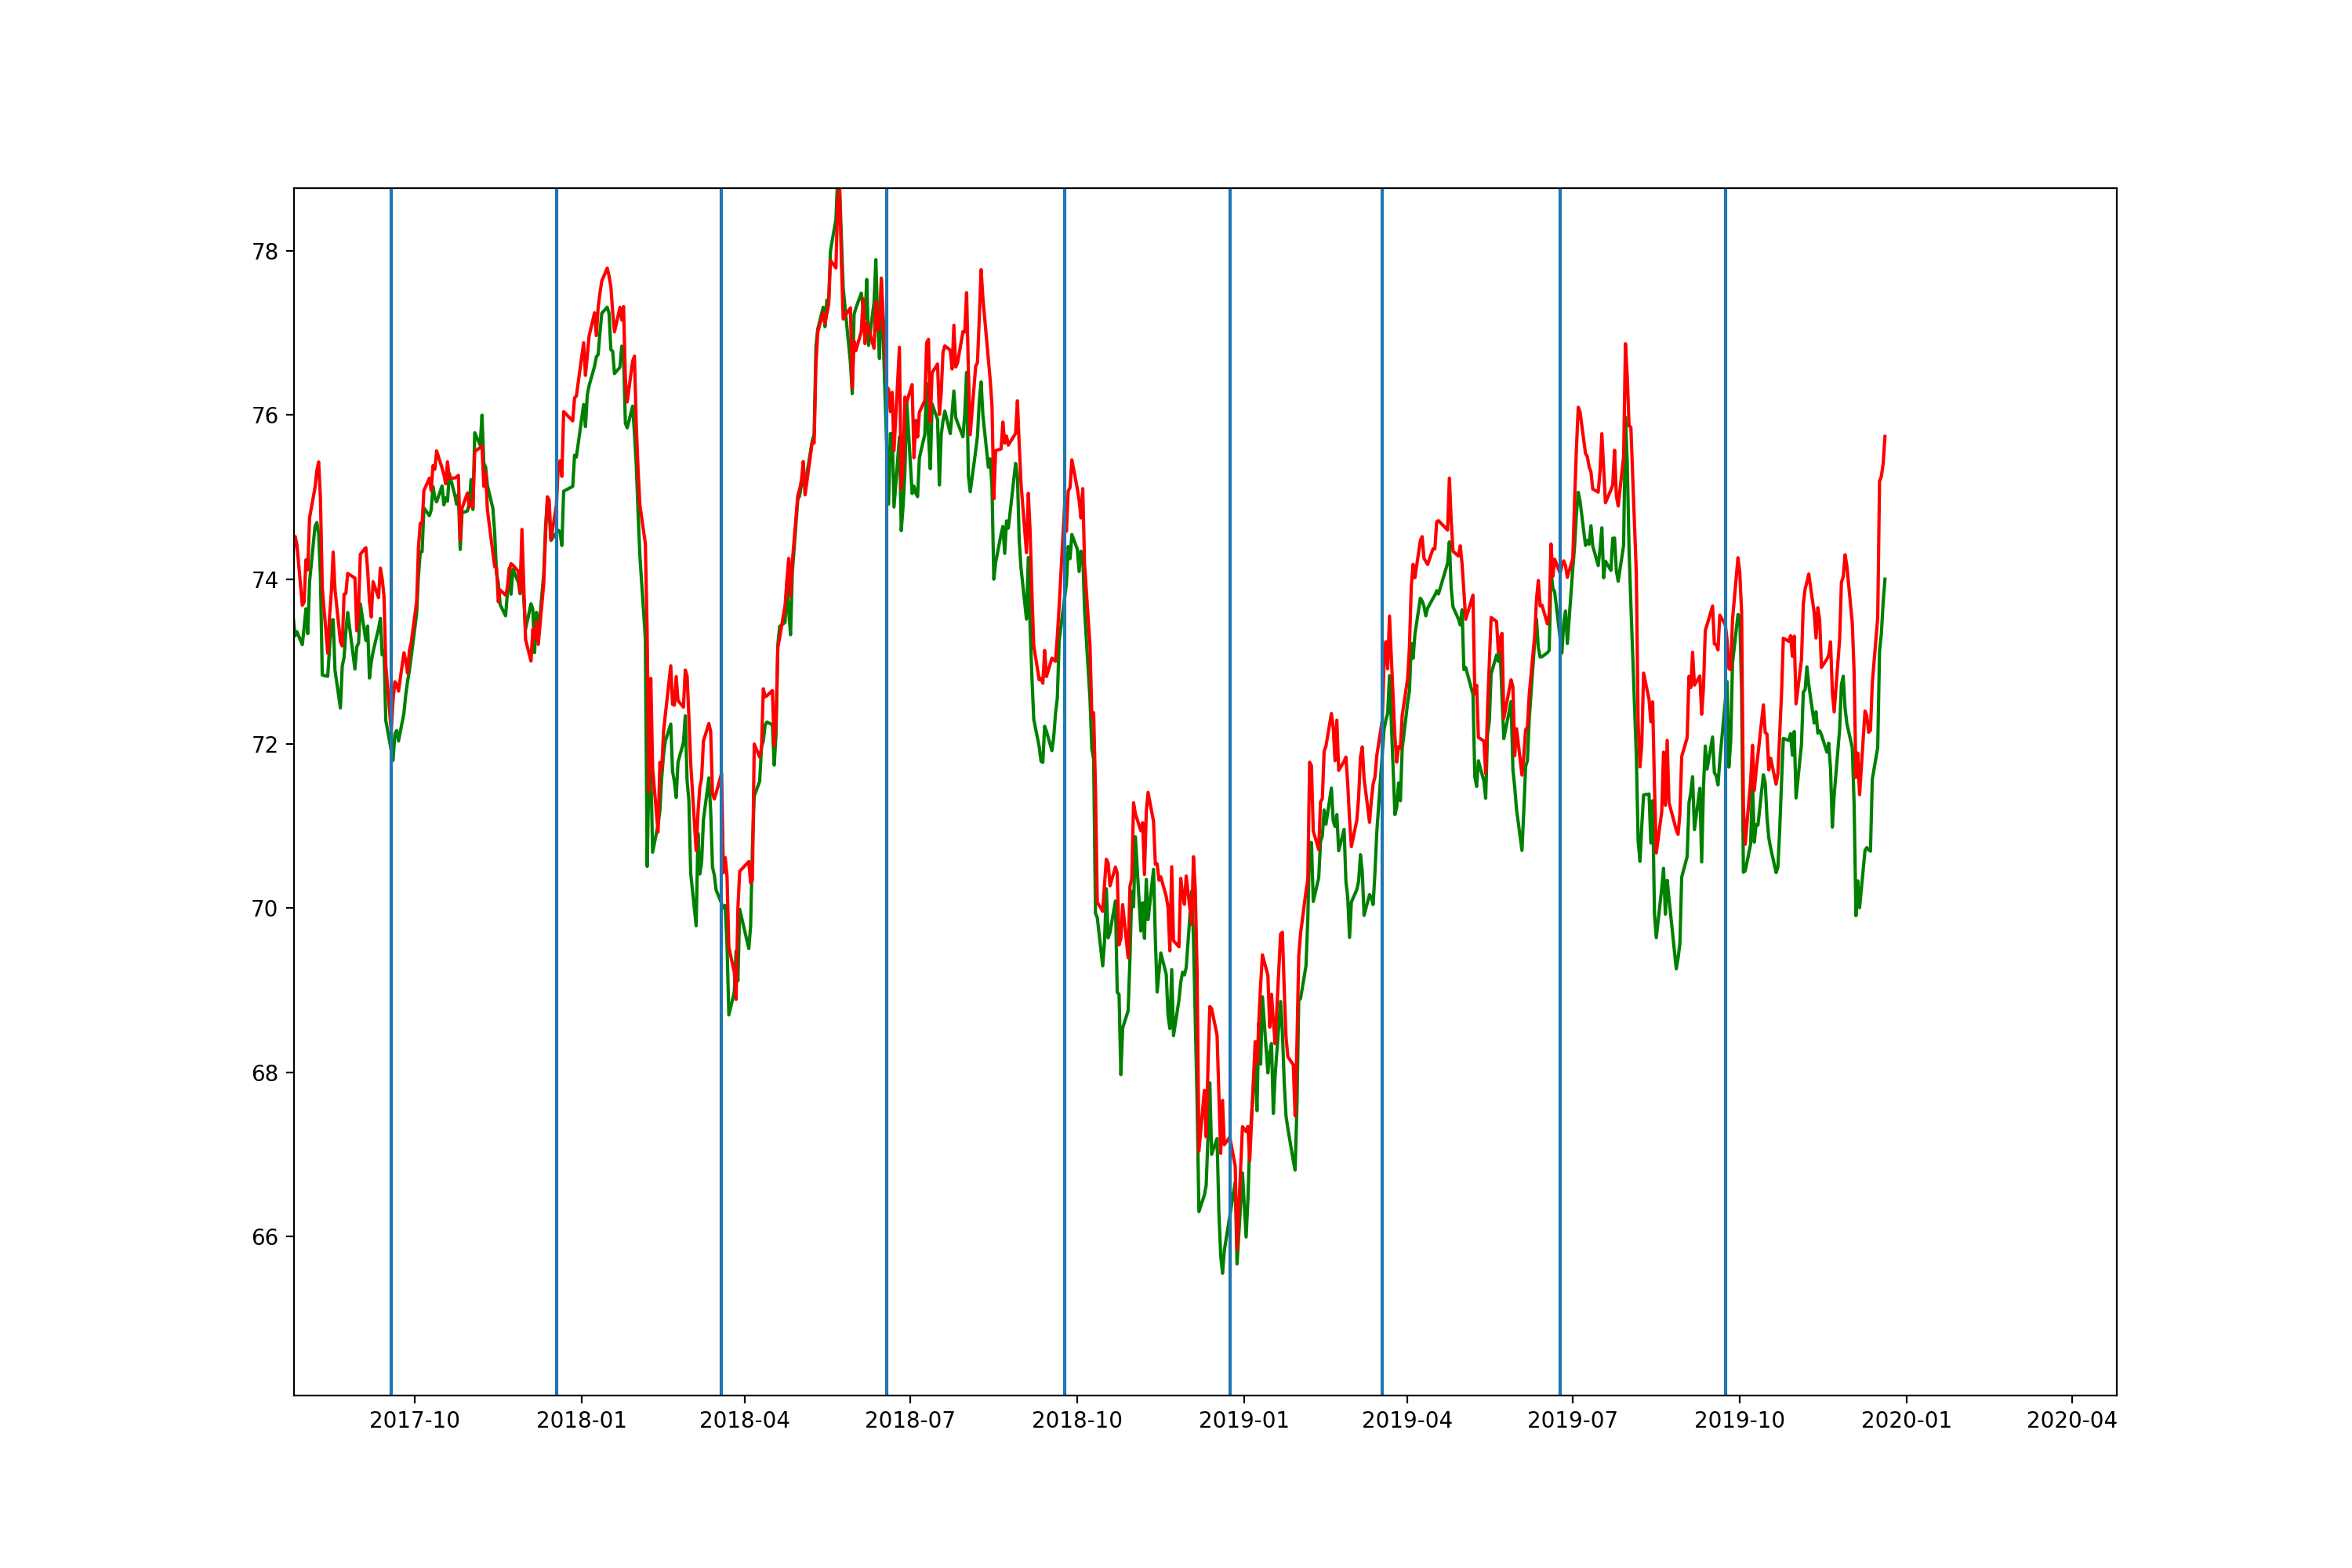

In [22]:
FTSEq317 = FTSE[(FTSE['Date'] < quarterCutOffDates[0]) & (FTSE['Date'] > quarterCutOffDates[10])]['Open'].values
FTSEq317date = FTSE[(FTSE['Date'] < quarterCutOffDates[0]) & (FTSE['Date'] > quarterCutOffDates[10])]['Date'].values

f = plt.figure(figsize=(15,10))
axs = f.add_subplot(111)
axs.plot(totalMarketCap3yr.index.values,totalMarketCap3yr.values,'g')
axs.plot(FTSEq317date,FTSEq317/100,'r')
for quarter in quarterCutOffDates[1:]:
    axs.axvline(x=quarter)
#axs.show()

In [18]:
stockPrice = pd.read_csv('stockCSVs/MNG.L17-20.csv')
stockPrice['Date'] = pd.to_datetime(stockPrice['Date'])
stockPrice[(stockPrice['Date'] < quarterCutOffDates[0]) & (stockPrice['Date'] > quarterCutOffDates[0+1])]['Close']
#stockPrice[(stockPrice['Date'] > quarterCutOffDates[1])]
#stockPrice.iloc[510]
#type(stockPrice['Date'].values[0])# 
quarterCutOffDates[1:]


[datetime.date(2019, 9, 23),
 datetime.date(2019, 6, 24),
 datetime.date(2019, 3, 18),
 datetime.date(2018, 12, 24),
 datetime.date(2018, 9, 24),
 datetime.date(2018, 6, 18),
 datetime.date(2018, 3, 19),
 datetime.date(2017, 12, 18),
 datetime.date(2017, 9, 18),
 datetime.date(2017, 6, 19)]